# Library

In [13]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
DeviceStrategy_CPU()
from preprocessing_KK import *
from preprocessing_project_KK import *
from description_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *
from visualization_KK import *

Cuda is Ready?  True

Tensorflow Version:  2.18.0
Keras Version:  3.7.0
Torch Version:  2.5.0+cu124


# Hyperparameters

In [28]:
# Data
FOLDER_LOCATION = os.path.join('.', 'Data')
DF_YEAR = [2022, 2021, 2020, 2019, 2018]
Y_colname = '학습효과성'
X_custom = {
    '문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1': {99:0}, 
    '학력별': {4:0}, 
    '문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?': {99:1}, 
    '직장의 규모': {9:0},
    '근무기간': {9:0}
}
X_dummy = [
    'DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분',
    'DQ6. 귀하께서는 건강에 자신 있습니까?',
    'DQ7. 귀하의 주된 소득원천은 무엇입니까?',
    'DQ9. 귀하의 현재 고용형태는 어떻게 되십니까?',
    'DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?',
    '직업'
]           
X_reverse = [
    '문A1-1) 작년(21.01.01~21.12.31) (1) 학위(졸업장) 취득을 위한 교육 참여 경험 여부',
    '문B1-5) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__학습을 목적으로 텔레비전^ 라디오 등을 활용해서 새로운 지식을 습득한 적이 있다',
    '문B1-7) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__역사적·자연적·산업적 장소를 방문해서 지식을 습득한 적이 있다',
    '문B1-1) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__가족^ 친구 또는 직장동료^ 상사의 도움이나 조언을 통해 지식을 습득한 적이 있다',
    '문B1-2) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__트위터^ 페이스북^ 카페^ 블로그^ 밴드 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다',
    '문B1-3) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__유튜브(Youtube) 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다',
    '문B1-4) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__인터넷 뉴스^ E-book 등 온라인매체를 활용해서 새로운 정보나 기술을 습득한 적이 있다',
    '문B1-6) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__책이나 전문잡지 등 인쇄매체를 활용해서 지식을 습득한 적이 있다',
    '문B1-8) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__도서관 등을 방문해서 새로운 사실을 배운 적이 있다',
    '문B1-9) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__축제^ 박람회^ 음악회 등에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게된 적이 있다',
    '문B1-10) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__스포츠^ 등산 등 신체를 움직이는 활동에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게 된 적이 있다',
    '문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?',
    '문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?',
    'DQ8. 귀하께서는 현재 수입을 목적으로 일하고 계십니까?',
    '경활상태',
    '지역규모별',
    '건강에 대한 자신감',
    '취약계층',
    '취업구분',
    '고용형태',
    '평생학습 참여자',
    '형식교육 참여자',
    '비형식교육 참여자',
    '직업관련 비형식교육 참여자',
    '동시 참여자'
]
X_delete = [
    'ID', '원가중치', '평생학습 참여자', '직업관련 비형식교육 참여자', '동시 참여자',
    # DQ컬럼과 중복(by 조은지)
    '학력별', '자녀유무 및 막내자녀 상태', '동거가족 유무', '부양가족 유무', '취학 전의 손자/손녀 유무', 
    '건강에 대한 자신감', '고용형태', '직업', '직장의 규모', '근무기간',
    '문A1-1) 작년(21.01.01~21.12.31) (1) 학위(졸업장) 취득을 위한 교육 참여 경험 여부'
]
TEST_SIZE = 0.2
RANDOM_STATE = 123
CLASS_STAT = True
SAMPLING_METHOD = 'auto'
SAMPLING_STRATEGY = 'auto'    # 'minority', 'not majority', 'not minority', 'all', 'auto'
SCALER = 'minmax'
LABEL_LIST = ['Non-satisfaction', 'Satisfaction']

# Model
################
tf.random.set_seed(123)
NODE_MLP = [128, 256, 128, 64, 32, 10]
NODE_CNN1 = [128, 256, 128]
NODE_CNN2 = [64, 32, 10]
KERNEL_SIZE = 5
STRIDE = 1
PADDING = 'same'
POOL_SIZE = 2
POOL_STRIDE = 2
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = None
LEARNING_RATE = 0.001
# REGULARIZER = regularizers.l2(LEARNING_RATE)
DROPOUT_RATIO = 0.25
WEIGHT_METHOD = 'sample'   # None, 'class', 'sample'
if WEIGHT_METHOD != None:
    LOSS = 'categorical_crossentropy'
else:
    LOSS = 'sparse_categorical_crossentropy'
METRICS = ['accuracy']    # 'accuracy', 'Precision', 'Recall', 'AUC', 'F1Score'
VALIDATION_SPLIT = 0.25
VALIDATION_DATA = None
BATCH_SIZE = 64
EPOCHS = 2000
VERBOSE = 0
################
SHAP = True
FEATURE_PERTURBATION = 'tree_path_dependent'    # 'tree_path_dependent', 'interventional'
X_TOP_DISPLAY = 50
DEPENDENCY = False
################
MONITOR = 'val_accuracy'    # 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'
MONITOR_MODE = 'max'
EARLYSTOP_PATIENT = int(EPOCHS*0.1)

# Save
SAVE_NAME_PREDSTAT = 'DescriptiveStatistics_BinaryPred.csv'


# Data Merge

In [29]:
# Data Loading
df_dict = dict()
df_columns = pd.read_excel(os.path.join(FOLDER_LOCATION, '평생교육실태조사_코드명통합_수정본.xlsx')).iloc[:,2:]
for year in DF_YEAR:
    folder_location=os.path.join(FOLDER_LOCATION, '{}_총괄_20250320_36011.csv'.format(year))
    df_dict[year] = pd.read_csv(folder_location, encoding='cp949')
    print(year, df_dict[year].shape)
    ## 변수명 DF_YEAR[0]기준으로 동일하게 변경
    if year != DF_YEAR[0]:
        df_sub = pd.concat([df_columns[[col for col in df_columns.columns if col.split('_')[1] == str(year)]], df_columns.iloc[:,[0]]], axis=1)
        df_rename = dict(df_sub[df_sub.iloc[:,1] != 0].dropna().reset_index().iloc[:,1:].values)
        df_dict[year] = df_dict[year].rename(columns=df_rename)
      
# Feature Comparison
colname_compare, colname_common = table_compare_dfscolname(df_dict[DF_YEAR[0]], [df_dict[i] for i in DF_YEAR[1:]],
                                                           colname_list=DF_YEAR)

## Final Feature
for year in DF_YEAR:
    ## 사용할 변수명 추출
    colnames = list(colname_common[[i for i in colname_common.columns if i.split('_')[1] == str(year)]].values.flatten())
    
    ## 최종선택과 추가해야할 변수 구분
    colname_select, colname_add = [], []
    for idx, colname in enumerate(colnames):
        if colname != 0:
            colname_select.append(colname)
        else:
            colname_add.append([i for i in colname_common.iloc[idx,:].unique() if i != 0][0])
            
    ## 변수 업데이트
    df_dict[year] = df_dict[year][colname_select]
    for add in colname_add:
        df_dict[year][add] = np.nan

## df 생성
df = dict_to_concatdf(df_dict)

2022 (9968, 437)
2021 (9905, 454)
2020 (9776, 434)
2019 (9973, 511)
2018 (11747, 600)


4it [00:03,  1.05it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.56it/s]


Final Shape of df:  (51369, 368)


# Preprocessing

In [30]:
# 비형식교육 참여자 여부 분리
df_train = df[df['비형식교육 참여자'] == 1].reset_index().iloc[:,1:]
df_test = df[df['비형식교육 참여자'] != 1].reset_index().iloc[:,1:]


Preprocessing for Data Prepare...
Initial Shape:  (18117, 368)

Deleting Non-meaning Variables...
Shape:  (18117, 339)

Preprocessing NAN...
Column Deleting...
These  78.17109144542773 %( 265 ) columns are containing more than  50.0 % null values!: ['문A2-1) 프로그램 유형__(1)학위취득을 위한 교육_1', '문A2-6) 연간참여시간__(1)학위취득을 위한 교육_1', '문A2-7) 자기부담학습비__(1)학위취득을 위한 교육_1', '문A2-5) 참여목적__(1)학위취득을 위한 교육_1', '문A2-1) 프로그램 유형__(2)성인기초 및 문자해득교육_1', '문A2-2) 프로그램 형태__(2)성인기초 및 문자해득교육_1', '문A2-3) 기관 유형__(2)성인기초 및 문자해득교육_1', '문A2-5) 참여목적__(2)성인기초 및 문자해득교육_1', '문A2-6) 연간참여시간__(2)성인기초 및 문자해득교육_1', '문A2-7) 자기부담학습비__(2)성인기초 및 문자해득교육_1', '문A2-8) 학습비 외부 지원여부__(2)성인기초 및 문자해득교육_1', '문A2-9) 학습비 외부 지원기관__(2)성인기초 및 문자해득교육_1', '문A2-10) 프로그램만족도__(2)성인기초 및 문자해득교육_1', '문A2-11) 프로그램 불만족 요인(중복응답)__(2)성인기초 및 문자해득교육_1-1', '문A2-11) 프로그램 불만족 요인(중복응답)__(2)성인기초 및 문자해득교육_1-2', '문A2-11) 프로그램 불만족 요인(중복응답)__(2)성인기초 및 문자해득교육_1-3', '문A2-11) 프로그램 불만족 요인(중복응답)__(2)성인기초 및 문자해득교육_1-5', '문A2-11) 프로그램 불만족 요인(중복응답)__(2)성인기초 및 문자해득교육_1-6', '문A2-11) 

100%|█████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 1666.73it/s]



Shape of Data:  (18117, 73)
Complete of fillna!
Shape:  (18117, 73)
Dummy Feature Generating...


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 181.53it/s]


Shape:  (18117, 100)

Object X Features:  []
Complete X Object Processing!
(6399, 99) (6399, 1)
(1600, 99) (1600, 1)
Data Split!


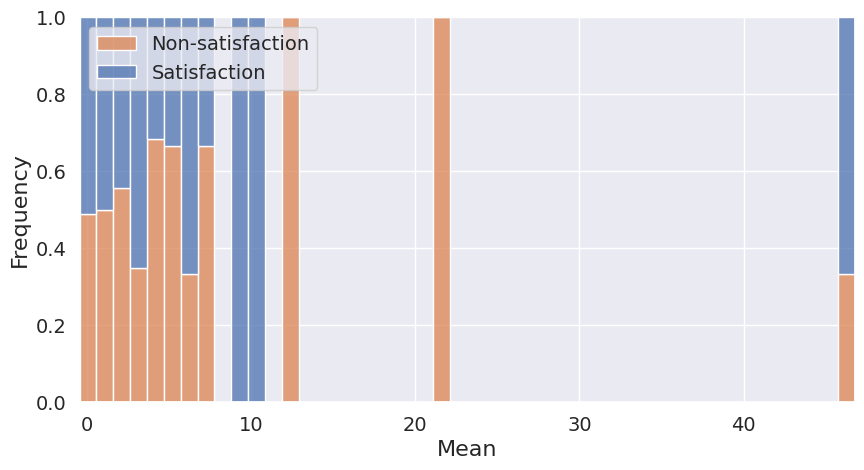

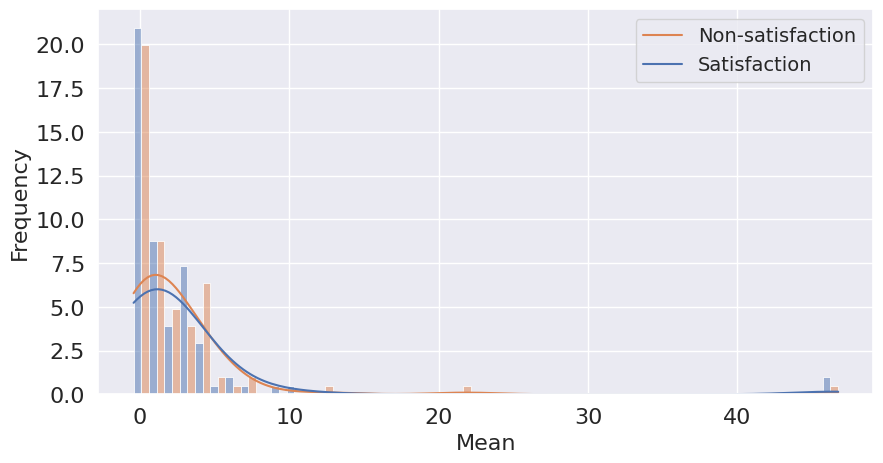

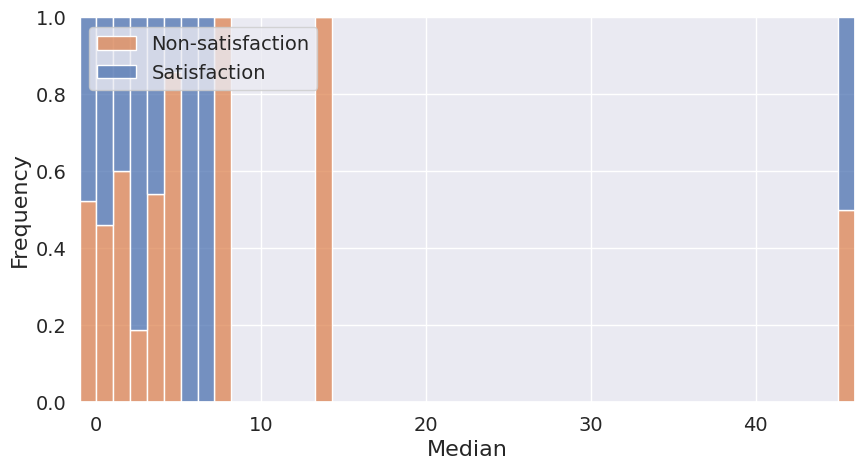

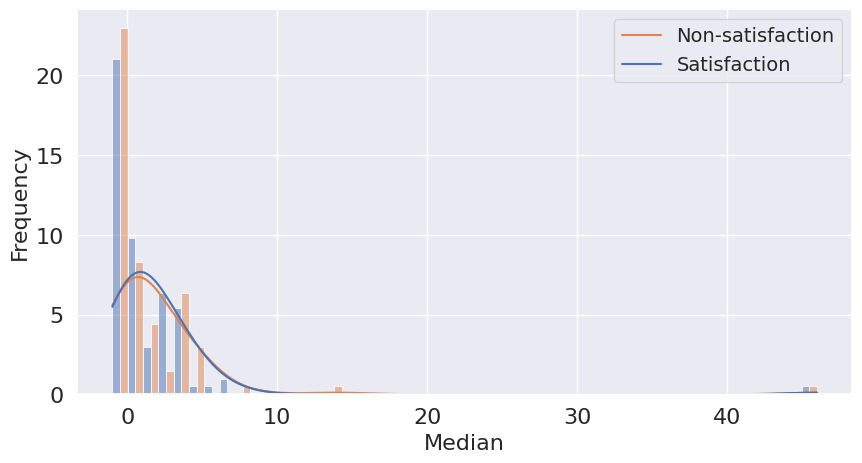

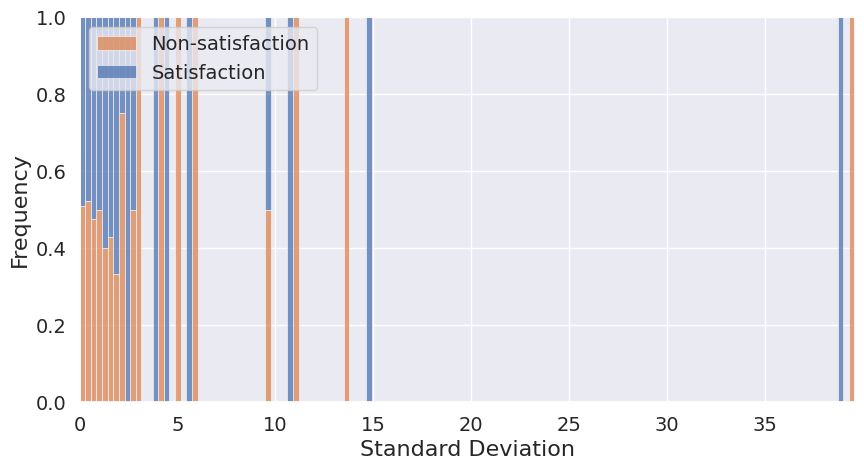

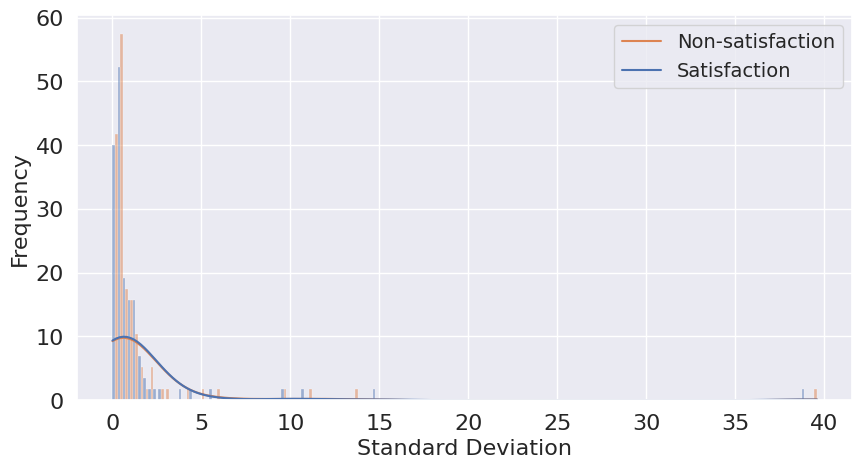

Number of significant features:  64 (0.6464646464646465%)


Non-satisfaction  \
학습 지향 평균                                     1.7500       1 (50.00%)   
                                             2.2500      17 (73.91%)   
                                             2.5000      32 (69.57%)   
                                             2.7500      74 (63.79%)   
                                             3.0000     109 (48.88%)   
...                                                              ...   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (2)성인기초및문해교육 0.0000     862 (10.79%)   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          0.0000     862 (10.78%)   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (2)성인기초및문해교육 1.0000        1 (9.09%)   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          1.0000       1 (16.67%)   
DQ7. 귀하의 주된 소득원천은 무엇입니까?_6                   0.0000     863 (10.79%)   

                                                      Satisfaction  \
학습 지향 평균                                     1.7500     1 (50.00%)   
                                             2.2500     6 (26.09%)   
                                             2.5000    14 (30.43%)   
                                             2.7500    42 (36.21%)   
                                             3.0000   114 (51.12%)   
...                                                            ...   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (2)성인기초및문해교육 0.0000  7126 (89.21%)   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          0.0000  7131 (89.22%)   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (2)성인기초및문해교육 1.0000    10 (90.91%)   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          1.0000     5 (83.33%)   
DQ7. 귀하의 주된 소득원천은 무엇입니까?_6                   0.0000  7135 (89.21%)   

                                                                     Statistics  
학습 지향 평균                                     1.7500  $\chi^2$=1324.61, $p$=0.00  
                                             2.2500                              
                                             2.5000                              
                                             2.7500                              
                                             3.0000                              
...                                                                         ...  
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (2)성인기초및문해교육 0.0000     $\chi^2$=0.00, $p$=1.00  
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          0.0000     $\chi^2$=0.00, $p$=1.00  
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (2)성인기초및문해교육 1.0000                              
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          1.0000                              
DQ7. 귀하의 주된 소득원천은 무엇입니까?_6                   0.0000         $T$=-0.35, $p$=0.73  

[619 rows x 3 columns]

Comparison Statistics of X by Y class!
Oversampling...
Ratio of Origin Y:  학습효과성 
1.0000    5721
0.0000     678
Name: count, dtype: int64
Ratio of Sapling Y:  학습효과성 
1.0000    5721
0.0000    5663
Name: count, dtype: int64

Preprocessing of Scaling...
(11384, 99) (11384, 1) 0.0 1.0000000000000002
(1600, 99) (1600, 1) 0.0 1.2077922077922079
Complete!


In [31]:
# Train + Validation Preprocessing
X_train, X_validate, X_colname, \
Y_train, Y_validate = preprocessing_edu(df_train, Y_colname=Y_colname,
                                    X_custom=X_custom, X_dummy=X_dummy, X_reverse=X_reverse, X_delete=X_delete,
                                    test_size=TEST_SIZE, class_stat=CLASS_STAT,
                                    sampling_method=SAMPLING_METHOD, sampling_strategy=SAMPLING_STRATEGY,
                                    scaler=SCALER, random_state=RANDOM_STATE,
                                    label_list=LABEL_LIST)

In [32]:
# Test Preprocessing
X_tr, X_val, X_col, \
Y_tr, Y_val = preprocessing_edu(df_test, Y_colname=Y_colname,
                                    X_custom=X_custom, X_dummy=X_dummy, X_reverse=X_reverse, X_delete=X_delete,
                                    test_size=TEST_SIZE, class_stat=not CLASS_STAT,
                                    sampling_method=None, sampling_strategy=SAMPLING_STRATEGY,
                                    scaler=SCALER, random_state=RANDOM_STATE,
                                    label_list=LABEL_LIST)
X_train, X_validate, X_test = feature_columns_mapping(pd.DataFrame(X_train, columns=X_colname),
                                                      pd.DataFrame(X_validate, columns=X_colname), 
                                                      pd.DataFrame(np.concatenate((X_tr, X_val), axis=0), columns=X_col))
X_colname = list(X_validate.columns)
X_train, X_validate, X_test = X_train.values, X_validate.values, X_test.values


Preprocessing for Data Prepare...
Initial Shape:  (33252, 368)

Deleting Non-meaning Variables...
Shape:  (33252, 339)

Preprocessing NAN...
Column Deleting...
These  86.13569321533923 %( 292 ) columns are containing more than  50.0 % null values!: ['문A2-1) 프로그램 유형__(1)학위취득을 위한 교육_1', '문A2-6) 연간참여시간__(1)학위취득을 위한 교육_1', '문A2-7) 자기부담학습비__(1)학위취득을 위한 교육_1', '문A1-2) 참여한 프로그램 수는 몇개입니까? (2) 성인기초 및 문자해득교육(문해교육)', '문A1-2) 참여한 프로그램 수는 몇개입니까? (3) 직업능력향상교육', '문A1-2) 참여한 프로그램 수는 몇개입니까? (5) 문화예술스포츠교육', '문A1-2) 참여한 프로그램 수는 몇개입니까? (6) 시민참여교육', '문A1-2) 참여한 프로그램 수는 몇개입니까? (4) 인문교양교육', '문A2-5) 참여목적__(1)학위취득을 위한 교육_1', '문A2-1) 프로그램 유형__(2)성인기초 및 문자해득교육_1', '문A2-2) 프로그램 형태__(2)성인기초 및 문자해득교육_1', '문A2-3) 기관 유형__(2)성인기초 및 문자해득교육_1', '문A2-5) 참여목적__(2)성인기초 및 문자해득교육_1', '문A2-6) 연간참여시간__(2)성인기초 및 문자해득교육_1', '문A2-7) 자기부담학습비__(2)성인기초 및 문자해득교육_1', '문A2-8) 학습비 외부 지원여부__(2)성인기초 및 문자해득교육_1', '문A2-9) 학습비 외부 지원기관__(2)성인기초 및 문자해득교육_1', '문A2-10) 프로그램만족도__(2)성인기초 및 문자해득교육_1', '문A2-11) 프로그램 불만족 요인(중복응답)__(2)성인기초 및 문자해득교육_1

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1241.49it/s]



Shape of Data:  (33252, 46)
Complete of fillna!
Shape:  (33252, 46)
Dummy Feature Generating...


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 135.50it/s]

Shape:  (33252, 73)

Object X Features:  []
Complete X Object Processing!
(10011, 72) (10011, 1)
(2503, 72) (2503, 1)
Data Split!
Comparison Statistics of X by Y class!

Preprocessing of Scaling...
(10011, 72) (10011, 1) 0.0 1.0000000000000002
(2503, 72) (2503, 1) 0.0 1.0000000000000002
Complete!


# Modeling

## Machine Learning

Explanations of Y:


Features  \
0                                                                                              학습 지향 평균   
1                                                                  문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?   
2                                                                             DQ6. 귀하께서는 건강에 자신 있습니까?_1   
3                                                                             DQ6. 귀하께서는 건강에 자신 있습니까?_2   
4                                                                    DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_6.0   
5                                                                             DQ6. 귀하께서는 건강에 자신 있습니까?_3   
6                                                                    DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_7.0   
7                                                                    DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_4.0   
8                                                                            DQ7. 귀하의 주된 소득원천은 무엇입니까?_4   
9                                                                    DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_3.0   
10                                                                           DQ7. 귀하의 주된 소득원천은 무엇입니까?_5   
11                                                                   DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_8.0   
12                                                                   DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_9.0   
13                                                                            DQ6. 귀하께서는 건강에 자신 있습니까?_4   
14                                                                   DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_5.0   
15                                                                   DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_2.0   
16                                                                                         직업관련 목표지향 평균   
17                                                                           DQ7. 귀하의 주된 소득원천은 무엇입니까?_1   
18                                                                  DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분_9.0   
19                                                                   DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_1.0   
20                                                                  DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분_3.0   
21                                                                      DQ9. 귀하의 현재 고용형태는 어떻게 되십니까?_2.0   
22                                                                           DQ7. 귀하의 주된 소득원천은 무엇입니까?_3   
23                                                                      DQ9. 귀하의 현재 고용형태는 어떻게 되십니까?_1.0   
24                                                                  DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분_2.0   
25                                                                                                 Year   
26                     문A3-1) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__건강 관리   
27                                                                           DQ7. 귀하의 주된 소득원천은 무엇입니까?_2   
28                    문E1-4) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 다른 사람들과 함께 공부 하는 것이 좋다.   
29                                                                   DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_0.0   
30                                                                      DQ9. 귀하의 현재 고용형태는 어떻게 되십니까?_0.0   
31                                                                        문A2-7) 자기부담학습비__(3)직업능력향상교육_1   
32                                                                  DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분_5.0   
33                                       문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여횟수   
34                                                                  DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분_1.0   
35                                                                  DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분_0.0   
36                                                                                               월 가구소득   
37                 문F1-4) 다음 

Performance: 


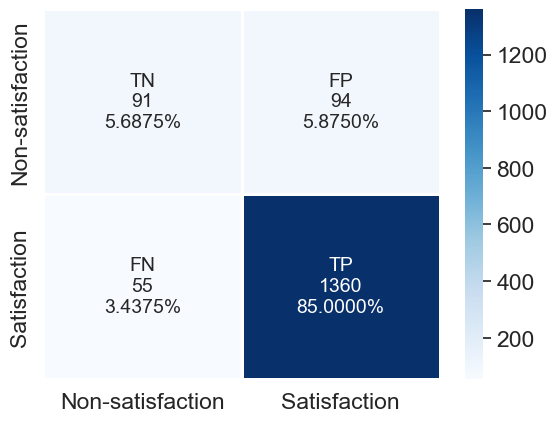

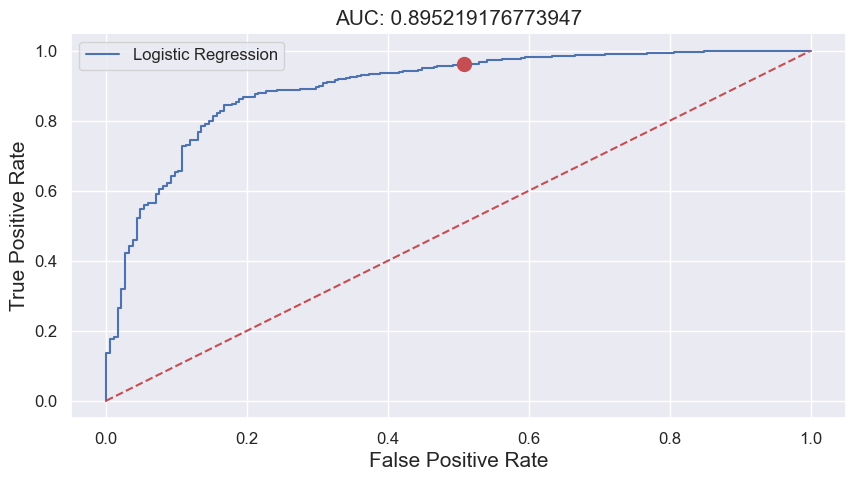

LogisticRegression(class_weight='balanced')

N True Positive True Negative False Positive False Negative  \
Test set  1600          1360            91             94             55   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9354 0.9611      0.4919   0.9481   0.9069            0.7265   

            AUC  
Test set 0.8952

N True Positive True Negative False Positive  \
Entire population  12968          6877          5332            500   

                  False Negative Precision Recall Specificity F1-score  \
Entire population            259    0.9322 0.9637      0.9143   0.9477   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9415            0.9390 0.9831

In [22]:
model_lr, Score_te_lr, Score_trte_lr = modeling_LogisticRegression(X_train, Y_train, X_validate, Y_validate, 
                                                         X_colname=X_colname,
                                                         shap=not SHAP,
                                                         feature_perturbation=FEATURE_PERTURBATION,
                                                         X_top_display=X_TOP_DISPLAY, 
                                                         dependency=DEPENDENCY,
                                                         label_list=LABEL_LIST)
display(model_lr, Score_te_lr, Score_trte_lr)

Explanations of Y:


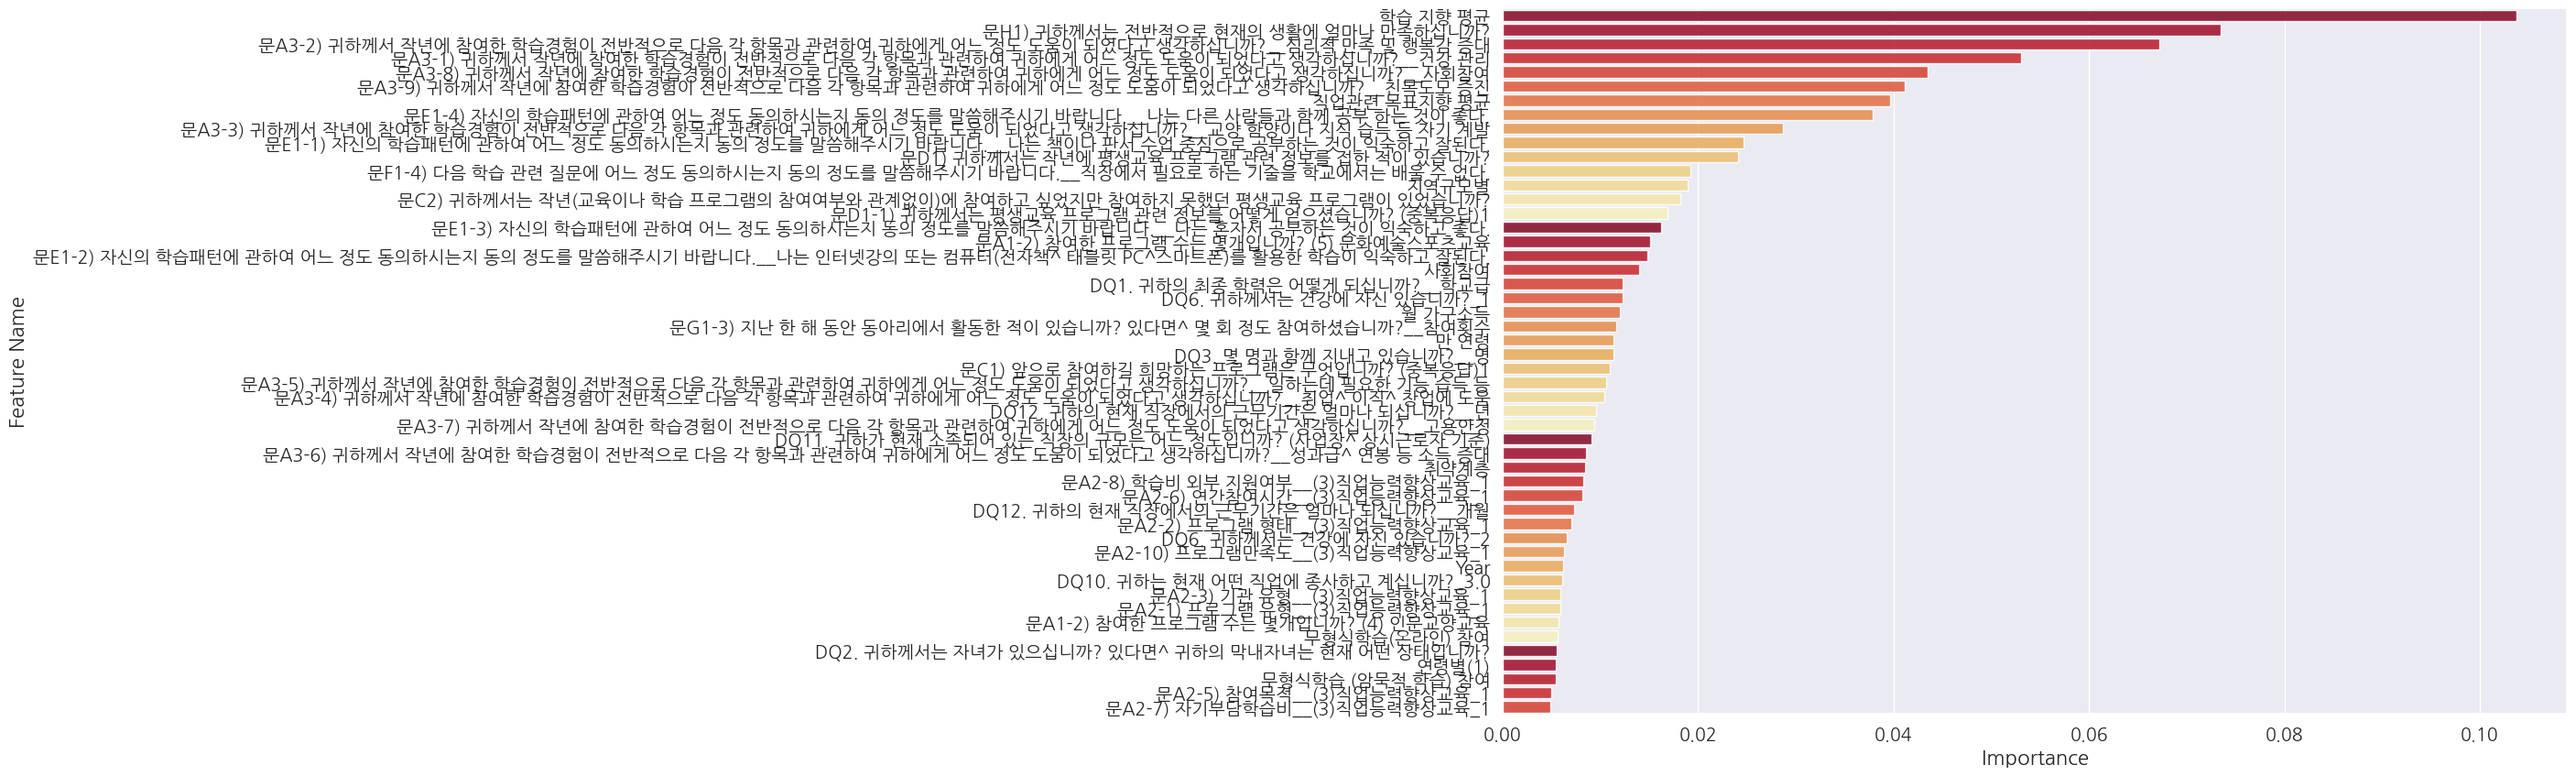

Performance: 


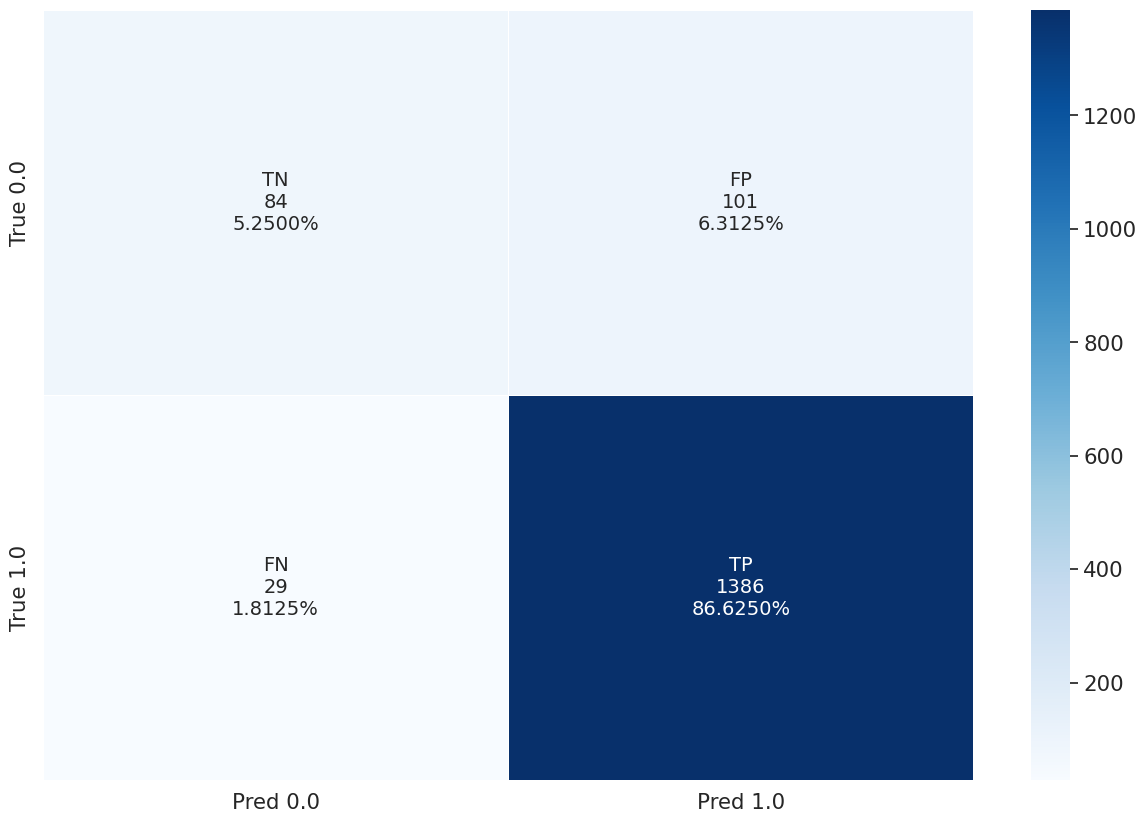

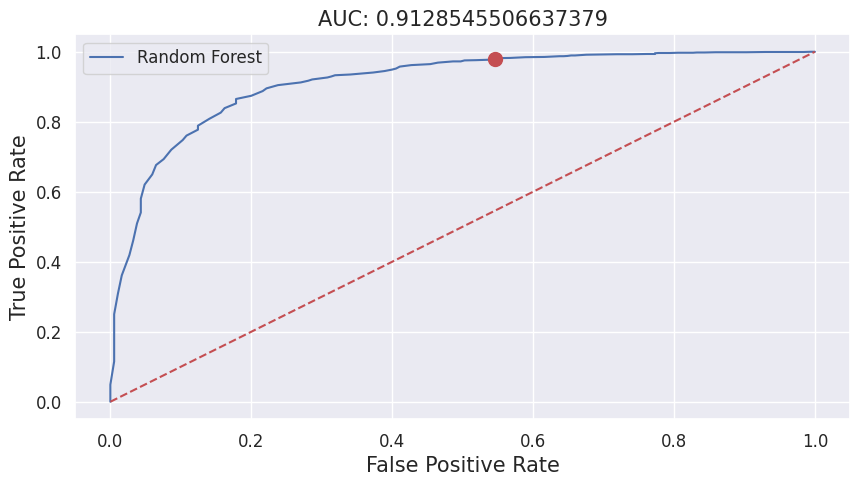

RandomForestClassifier(class_weight='balanced', random_state=123)

N True Positive True Negative False Positive False Negative  \
Test set  1600          1386            84            101             29   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9321 0.9795      0.4541   0.9552   0.9187            0.7168   

            AUC  
Test set 0.9129

N True Positive True Negative False Positive  \
Entire population  12984          7107          5747            101   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             29    0.9860 0.9959      0.9827   0.9909   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9900            0.9893 0.9989

In [70]:
model_rf, Score_te_rf, Score_trte_rf = modeling_RandomForestClassifier(X_train, Y_train, 
                                                             X_validate, Y_validate, 
                                                             X_colname=X_colname, 
                                                             shap=not SHAP, 
                                                             feature_perturbation=FEATURE_PERTURBATION,
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             dependency=DEPENDENCY,
                                                             label_list=LABEL_LIST)
display(model_rf, Score_te_rf, Score_trte_rf)

Explanations of Y:


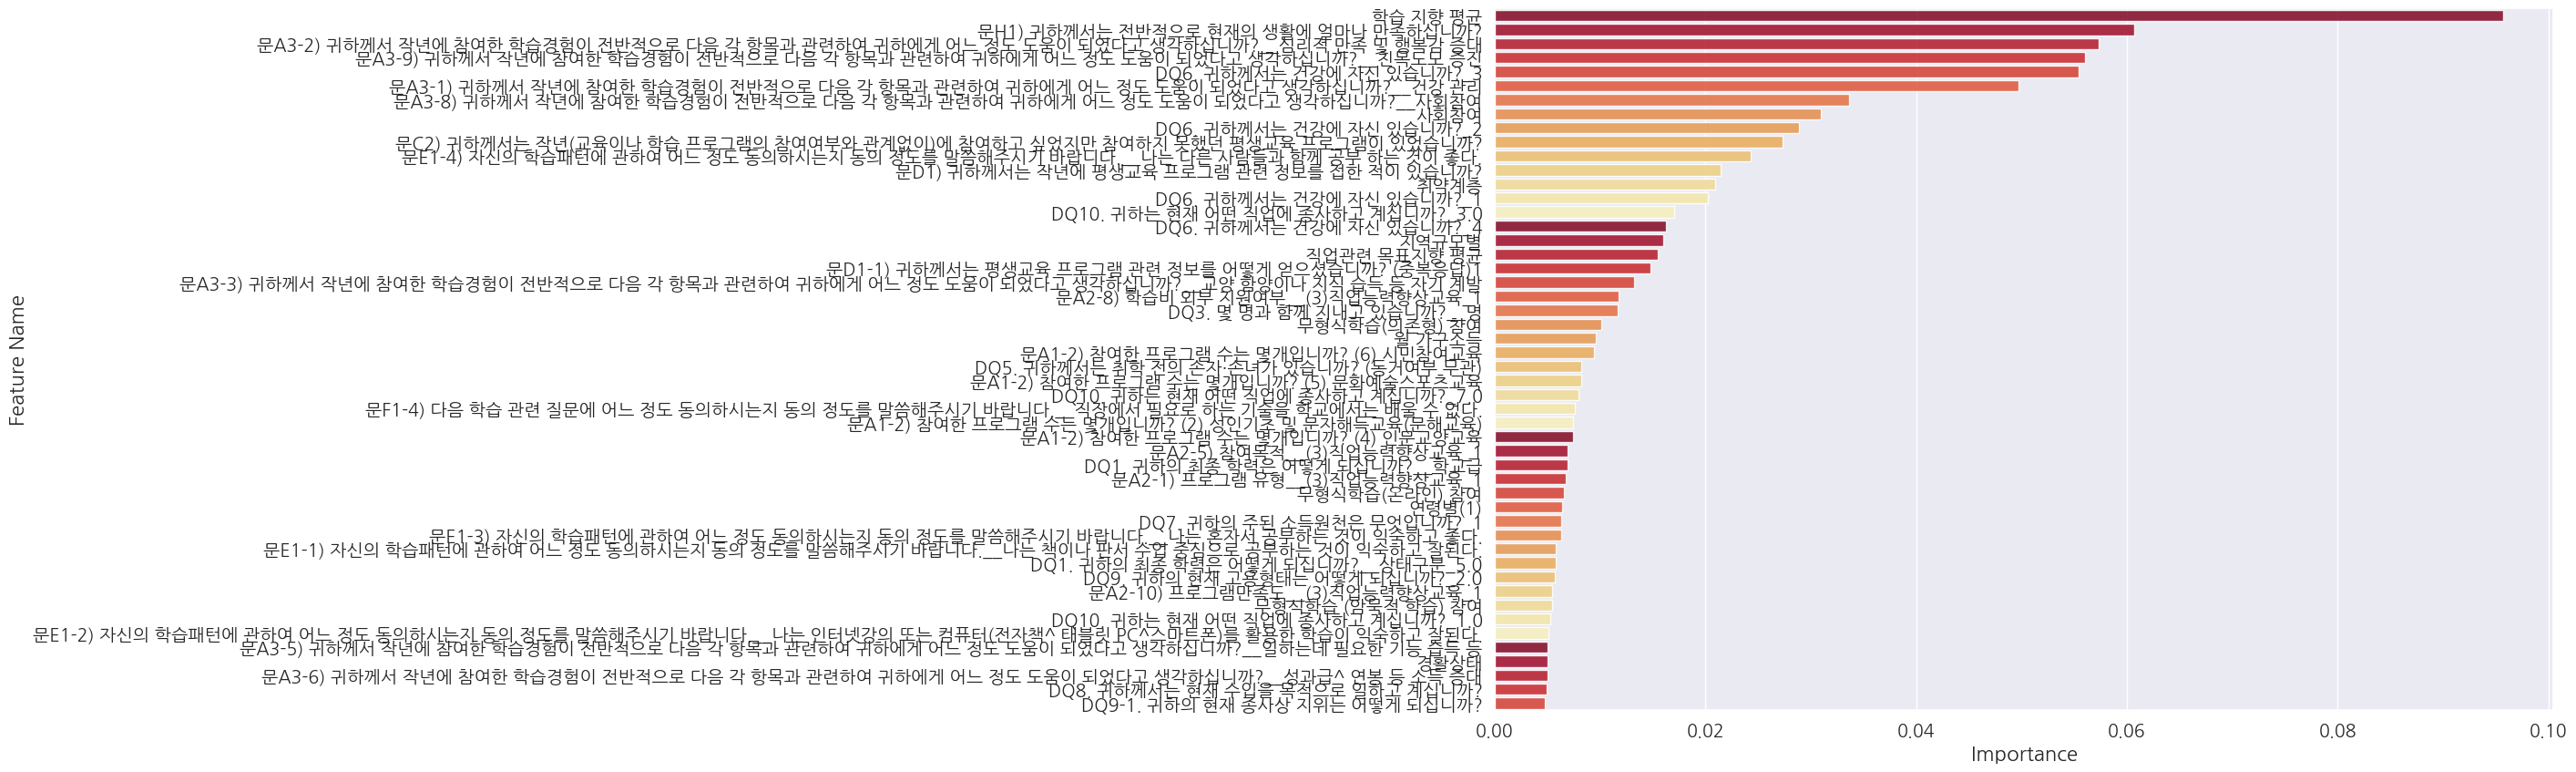

Performance: 


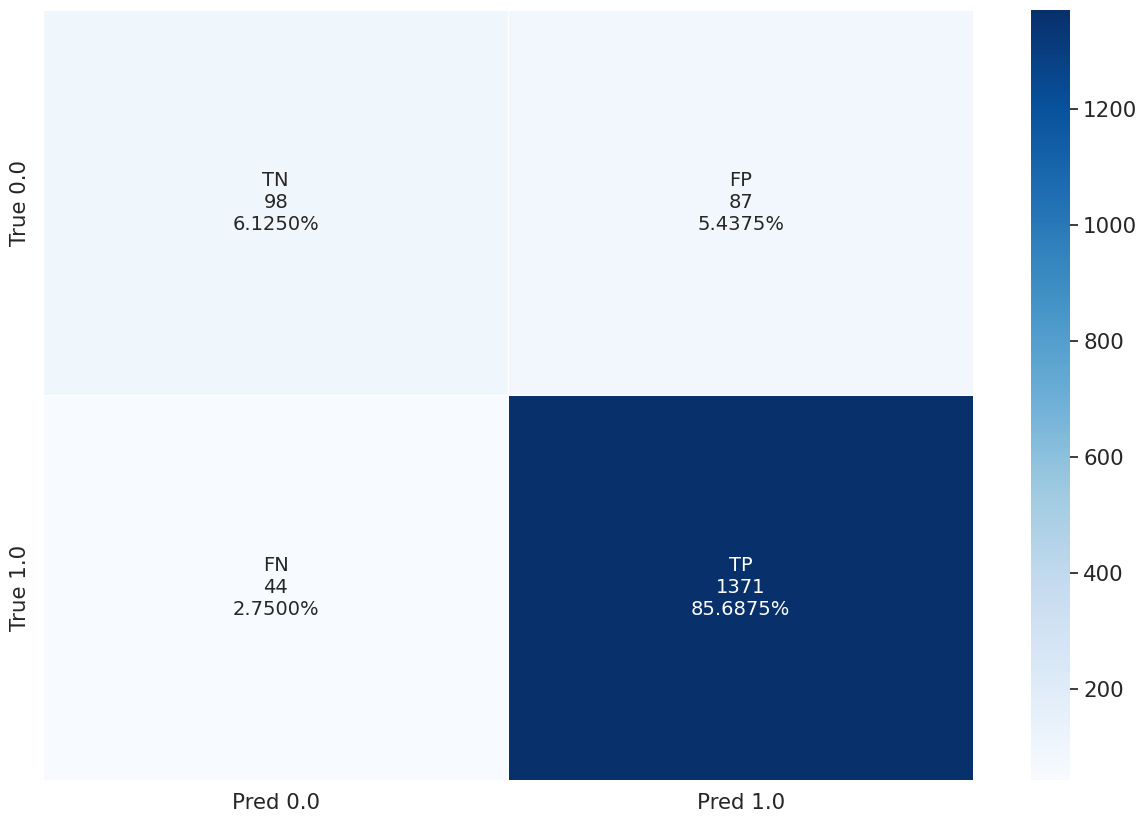

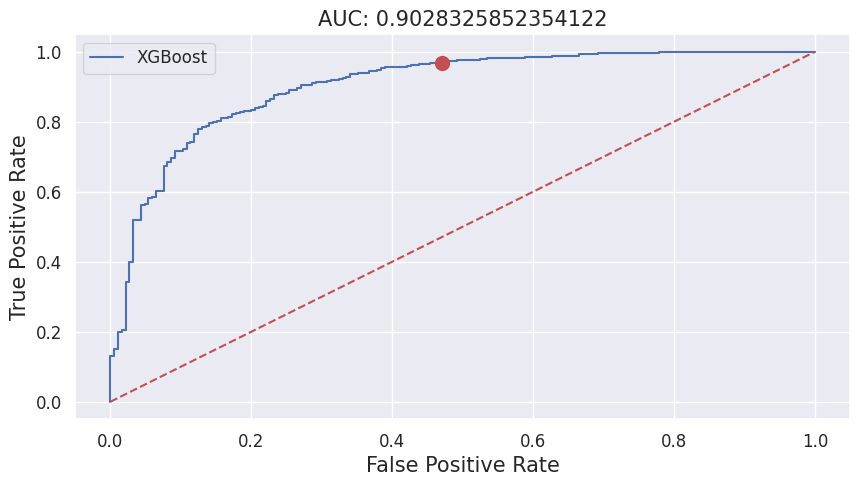

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

N True Positive True Negative False Positive False Negative  \
Test set  1600          1371            98             87             44   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9403 0.9689      0.5297   0.9544   0.9181            0.7493   

            AUC  
Test set 0.9028

N True Positive True Negative False Positive  \
Entire population  12984          7092          5759             89   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             44    0.9876 0.9938      0.9848   0.9907   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9898            0.9893 0.9977

In [71]:
model_xgb, Score_te_xgb, Score_trte_xgb = modeling_XGBClassifier(X_train, Y_train, 
                                                      X_validate, Y_validate, 
                                                      X_colname=X_colname, 
                                                      shap=not SHAP, 
                                                      feature_perturbation=FEATURE_PERTURBATION,
                                                      X_top_display=X_TOP_DISPLAY, 
                                                      dependency=DEPENDENCY,
                                                      label_list=LABEL_LIST)
display(model_xgb, Score_te_xgb, Score_trte_xgb)

Explanations of Y:


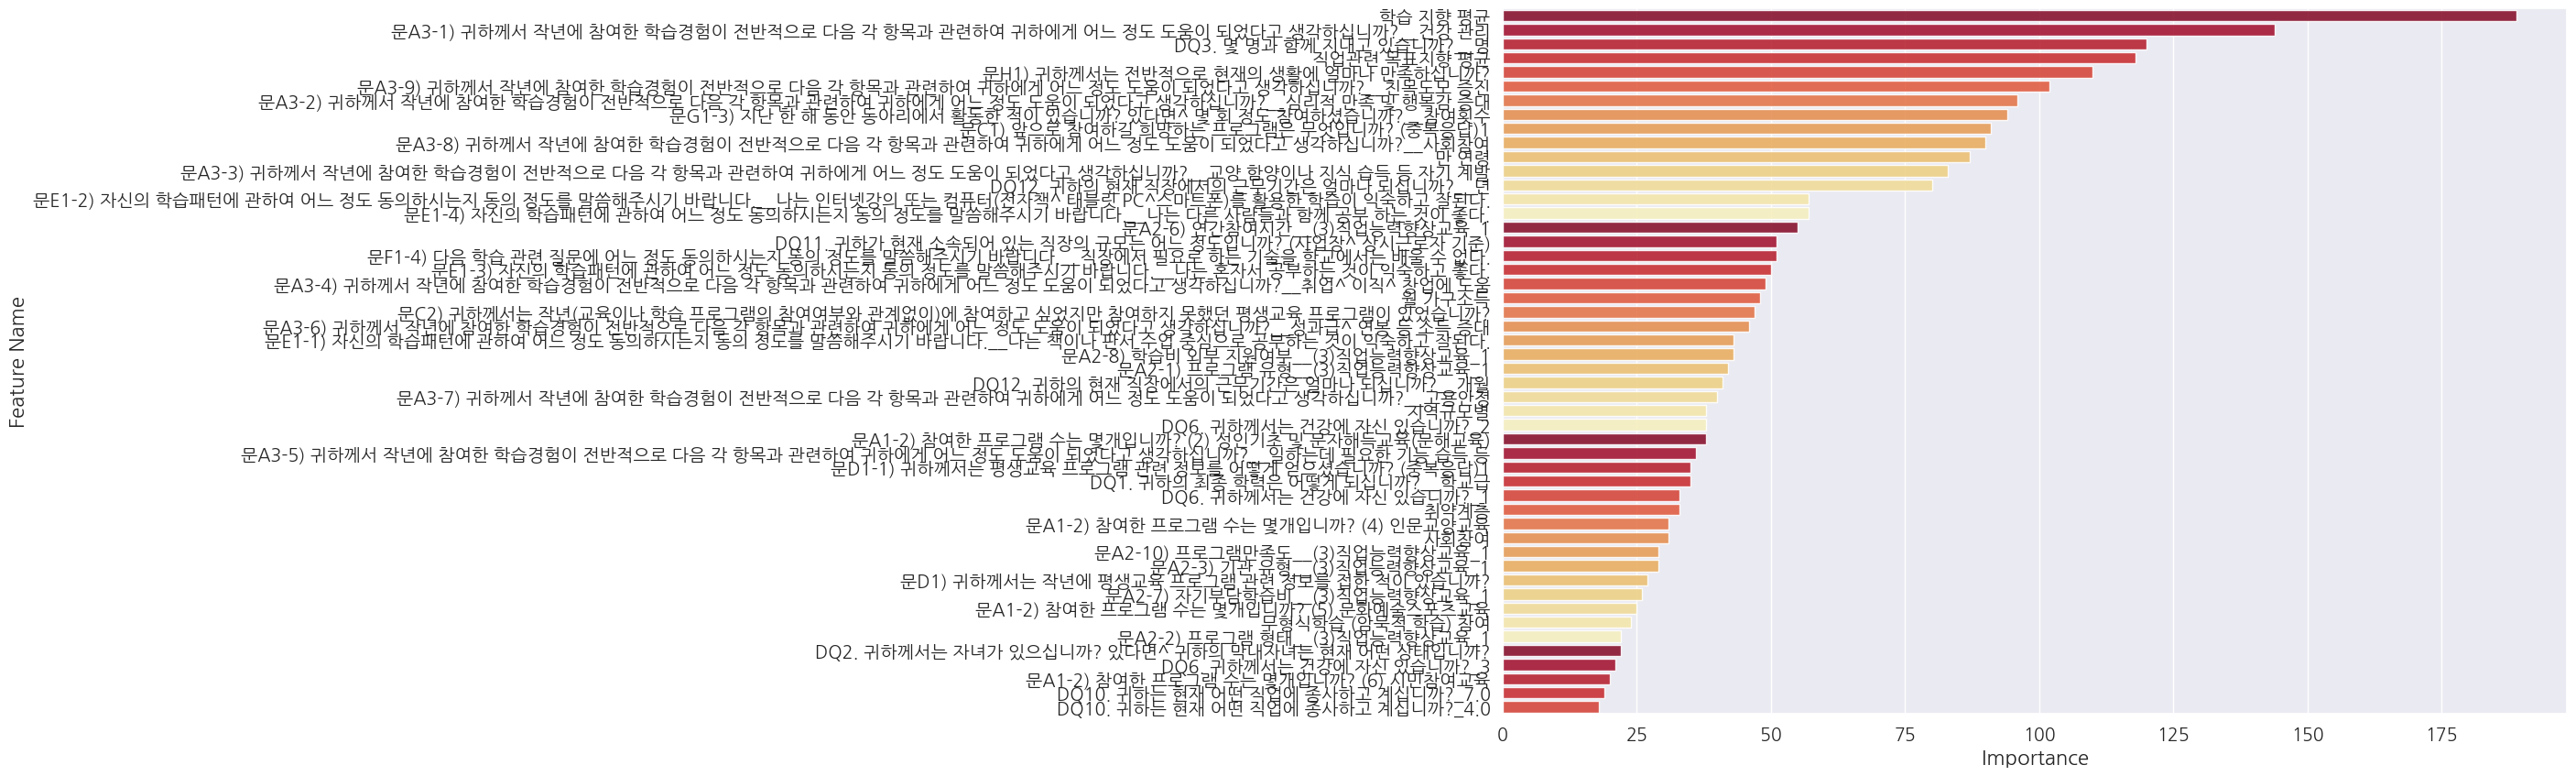

Performance: 


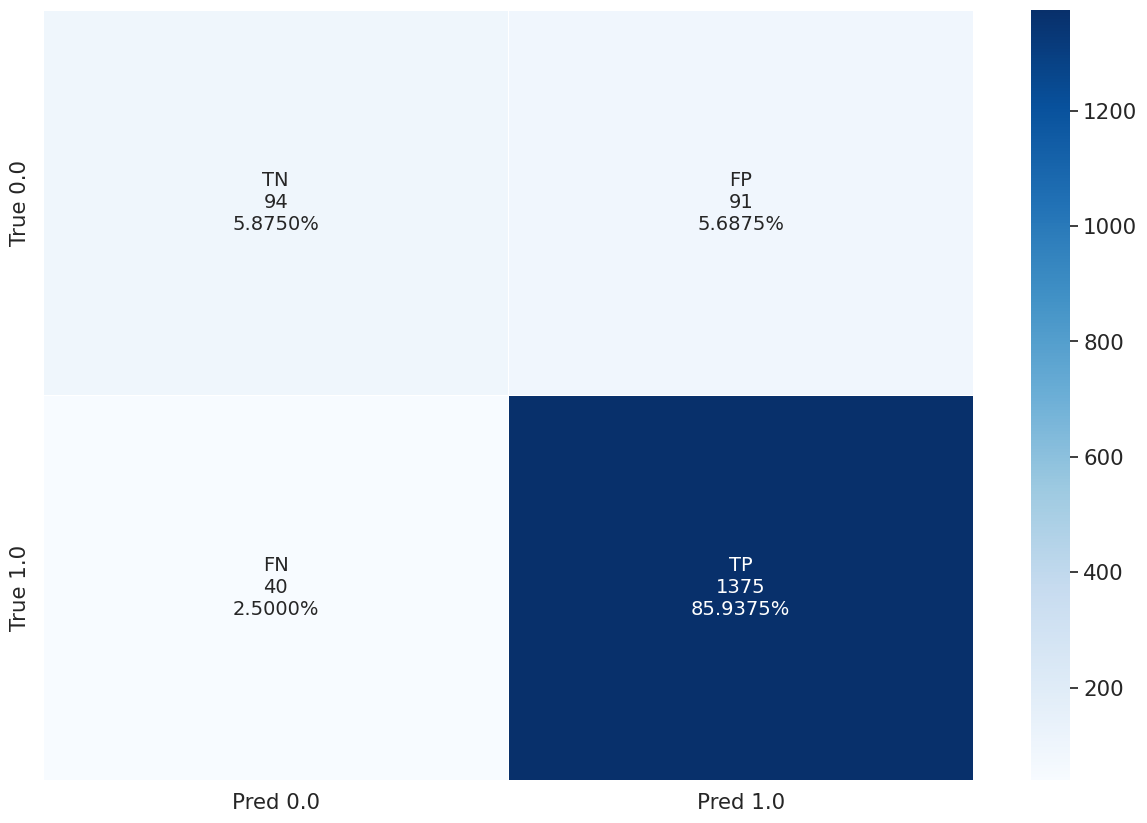

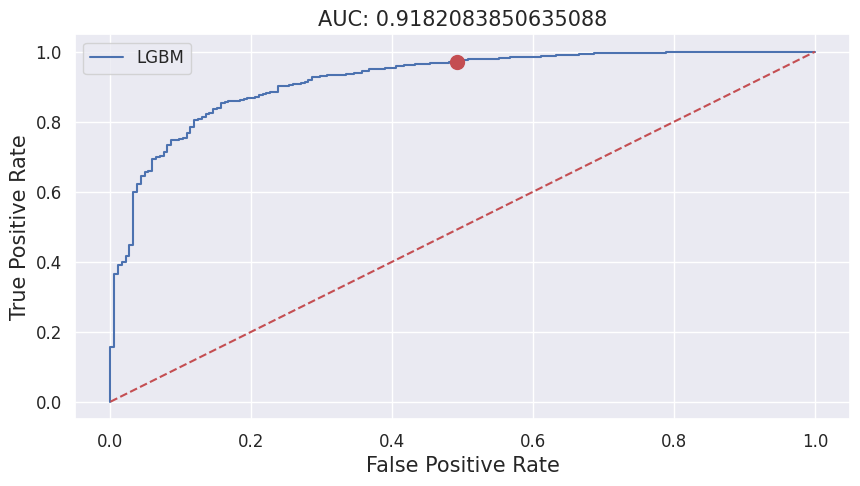

LGBMClassifier(class_weight='balanced', random_state=123, verbosity=-1)

N True Positive True Negative False Positive False Negative  \
Test set  1600          1375            94             91             40   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9379 0.9717      0.5081   0.9545   0.9181            0.7399   

            AUC  
Test set 0.9182

N True Positive True Negative False Positive  \
Entire population  12984          7083          5653            195   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             53    0.9732 0.9926      0.9667   0.9828   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9809            0.9796 0.9975

In [72]:
model_lgbm, Score_te_lgbm, Score_trte_lgbm = modeling_LGBMClassifier(X_train, Y_train, 
                                                         X_validate, Y_validate, 
                                                         X_colname=X_colname, 
                                                         shap=not SHAP, 
                                                         feature_perturbation=FEATURE_PERTURBATION,
                                                         X_top_display=X_TOP_DISPLAY, 
                                                         dependency=DEPENDENCY,
                                                         label_list=LABEL_LIST)
display(model_lgbm, Score_te_lgbm, Score_trte_lgbm)

Explanations of Y:


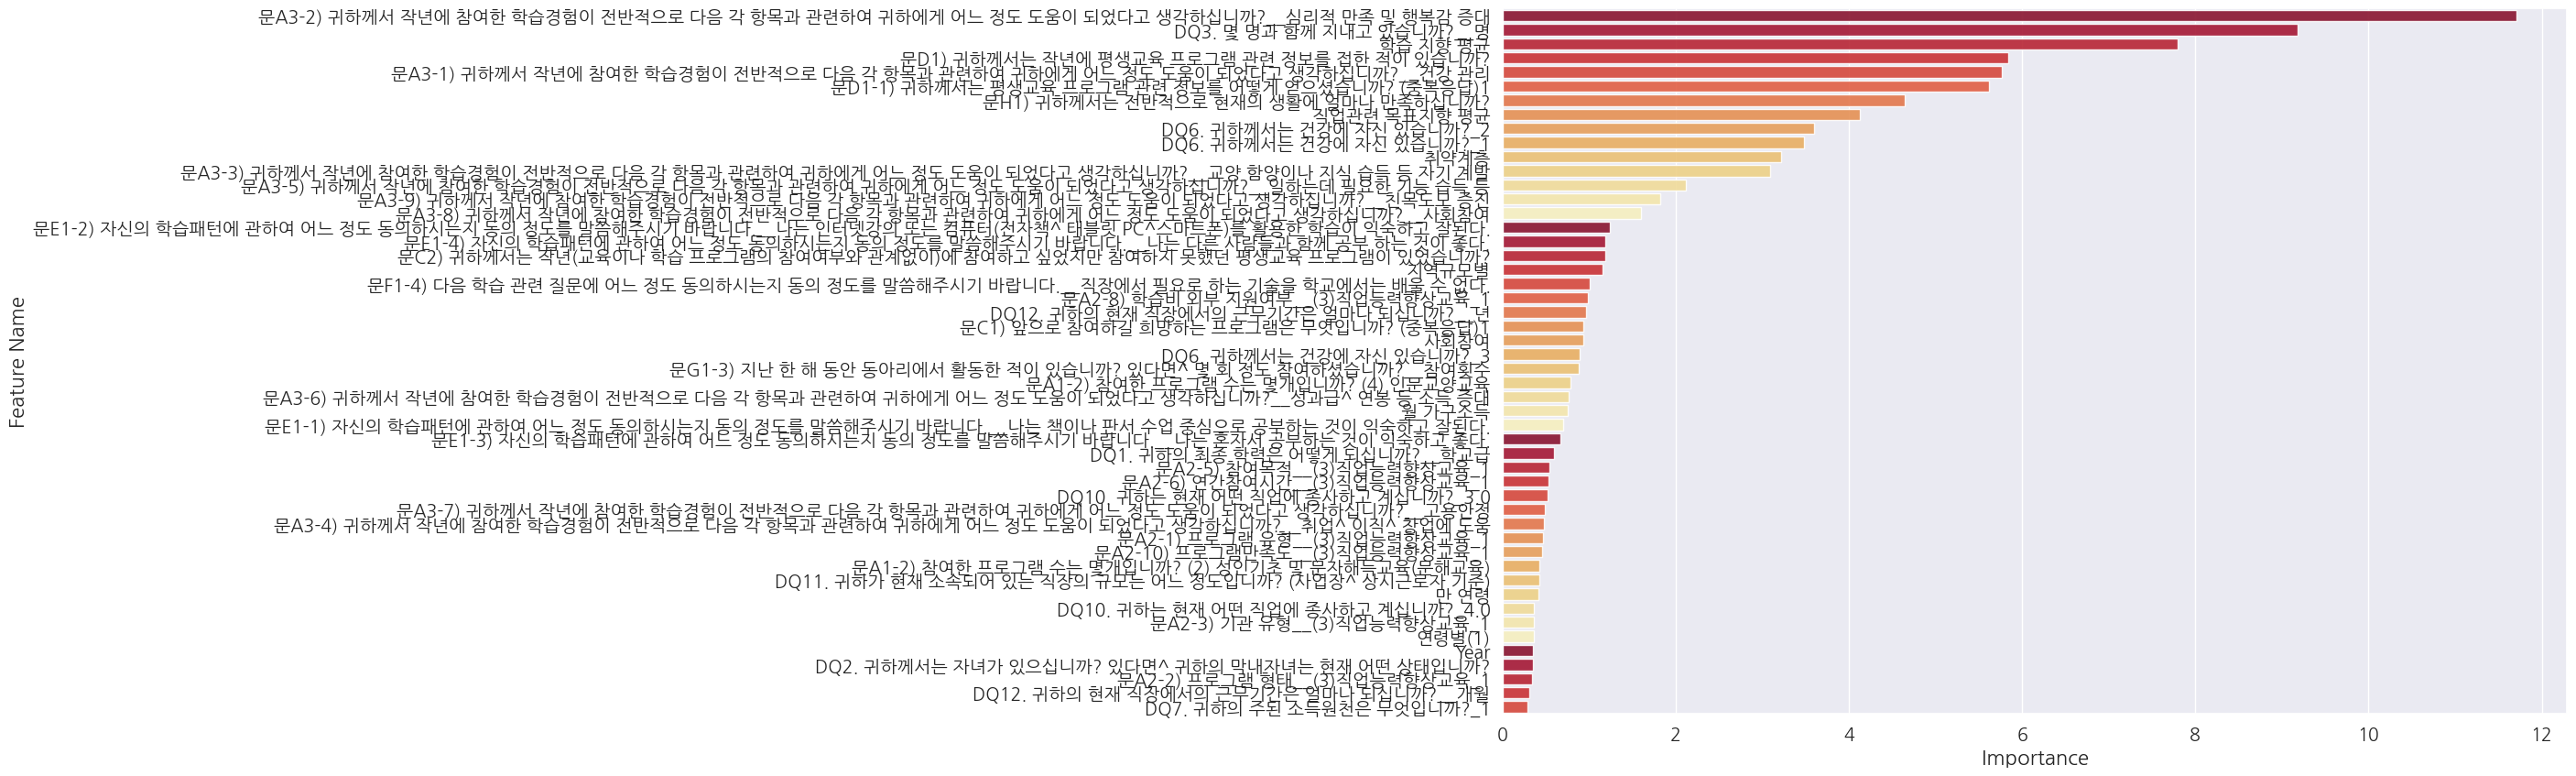

Performance: 


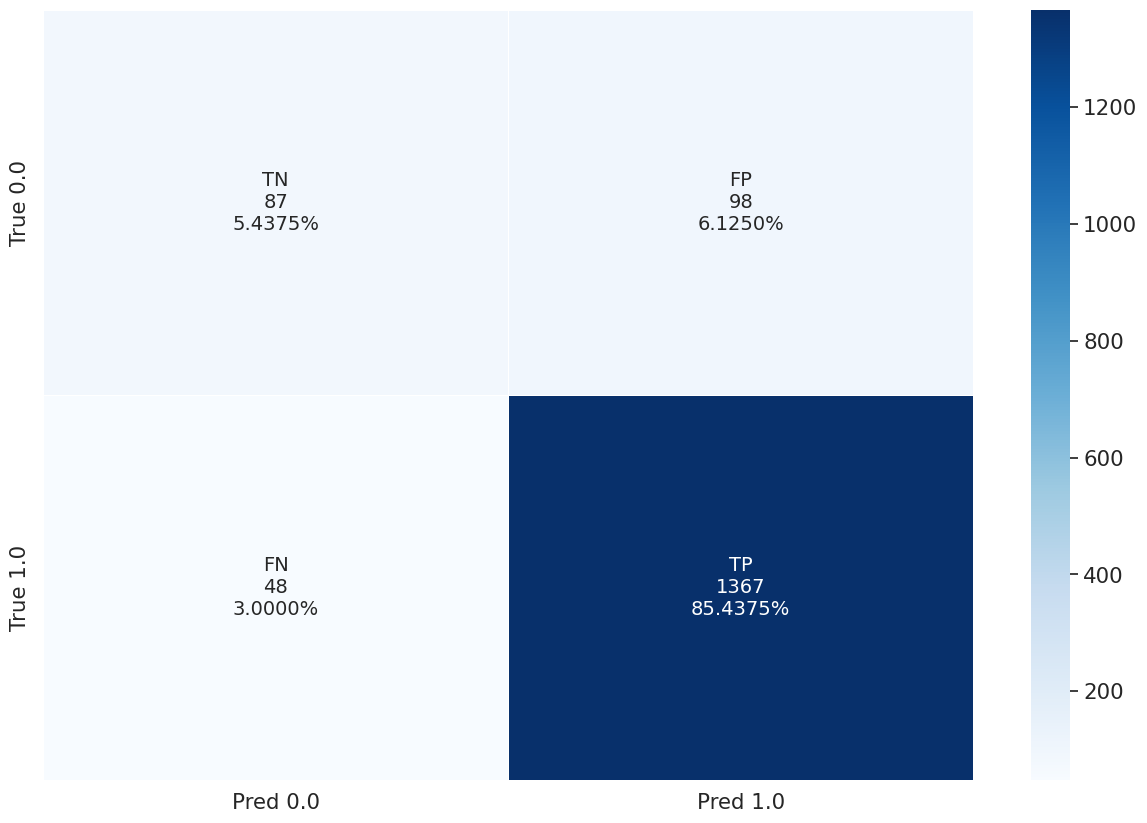

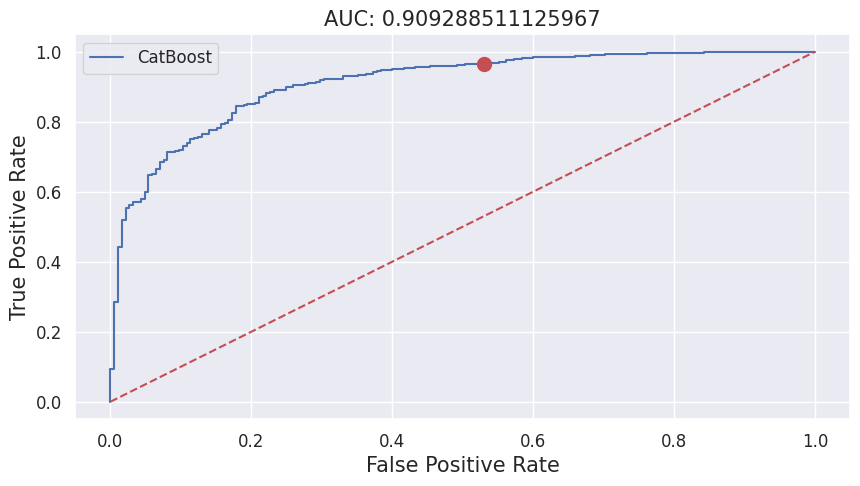

N True Positive True Negative False Positive False Negative  \
Test set  1600          1367            87             98             48   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9331 0.9661      0.4703   0.9493   0.9087            0.7182   

            AUC  
Test set 0.9093

N True Positive True Negative False Positive  \
Entire population  12984          7062          5599            249   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             74    0.9659 0.9896      0.9574   0.9776   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9751            0.9735 0.9962

In [73]:
model_catb, Score_te_catb, Score_trte_catb = modeling_CatBoostClassifier(X_train, Y_train, 
                                                             X_validate, Y_validate, 
                                                             X_colname=X_colname, 
                                                             shap=not SHAP, 
                                                             feature_perturbation=FEATURE_PERTURBATION,
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             dependency=DEPENDENCY,
                                                             label_list=LABEL_LIST)
display(model_catb, Score_te_catb, Score_trte_catb)

## Deep Learning

### MLP

Y_train_reshape: (11368, 1) --> (11368, 2)
Y_test_reshape: (1600, 1) --> (1600, 2)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 109)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,688 (354.25 KB)

 Trainable params: 90,688 (354.25 KB)

 Non-trainable params: 0 (0.00 B)

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [26:00<00:00,  1.28it/s]


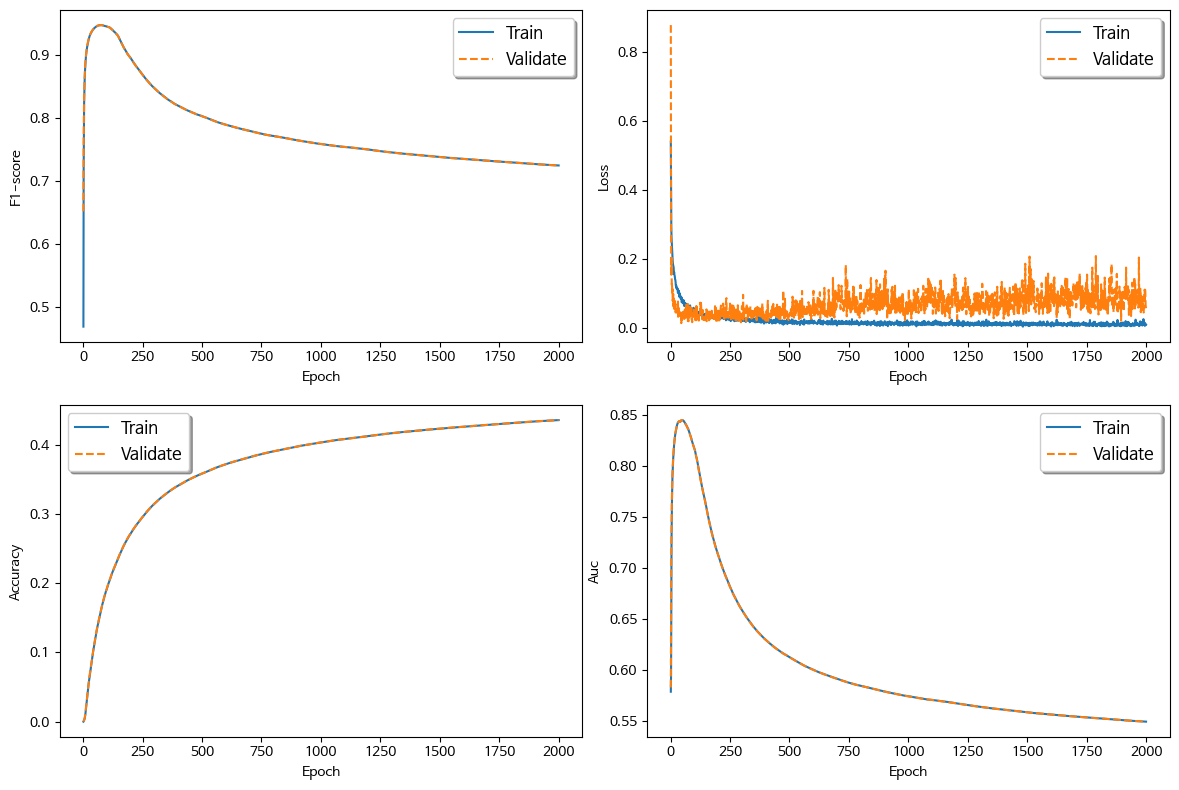

356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step  
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Performance: 


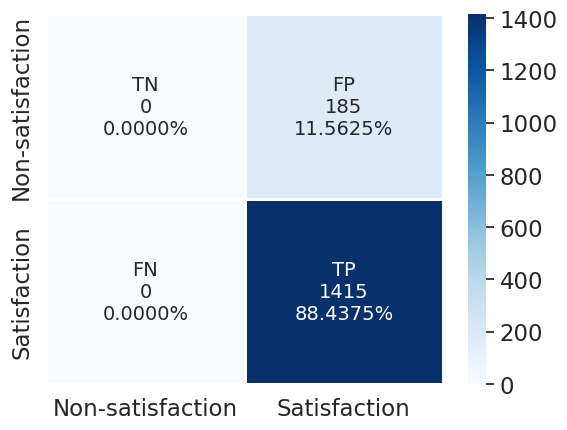

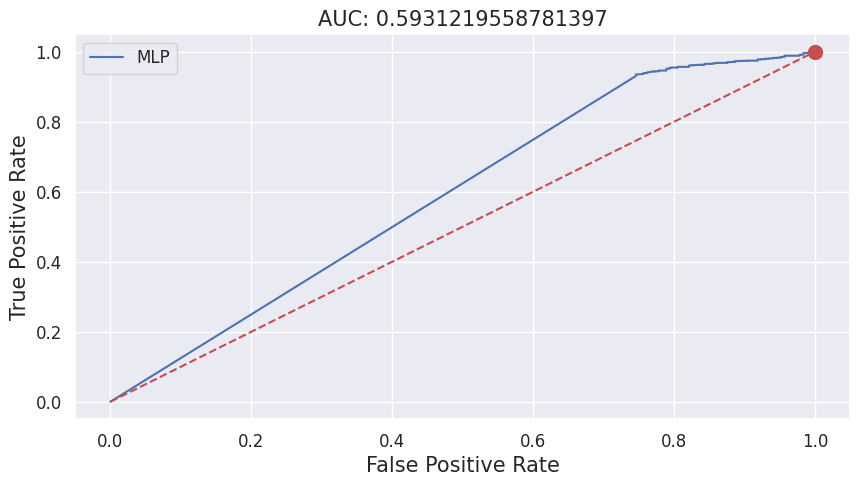

N True Positive True Negative False Positive False Negative  \
Test set  1600          1415             0            185              0   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.8844 1.0000      0.0000   0.9386   0.8844            0.5000   

            AUC  
Test set 0.5931

N True Positive True Negative False Positive  \
Entire population  12968          7136             0           5832   

                  False Negative Precision Recall Specificity F1-score  \
Entire population              0    0.5503 1.0000      0.0000   0.7099   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.5503            0.5000 0.5046

356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Performance: 


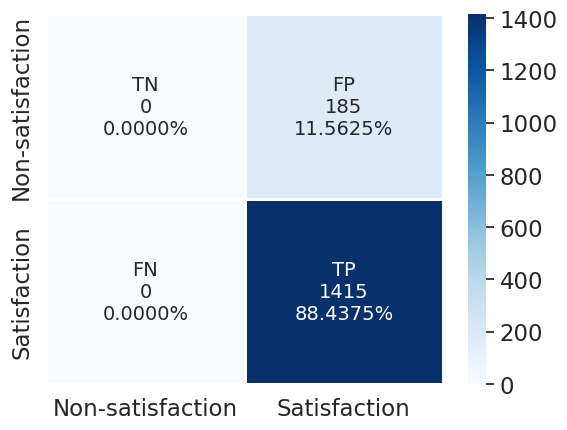

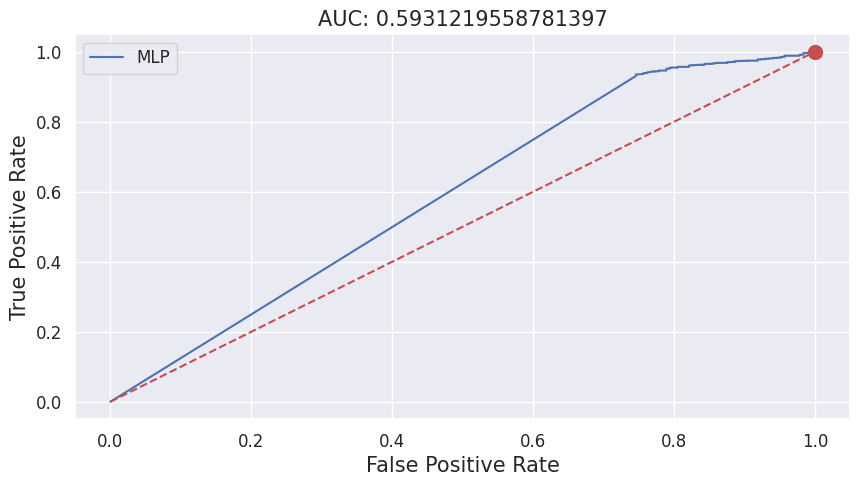

<Functional name=functional_1, built=True>

N True Positive True Negative False Positive False Negative  \
Test set  1600          1415             0            185              0   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.8844 1.0000      0.0000   0.9386   0.8844            0.5000   

            AUC  
Test set 0.5931

N True Positive True Negative False Positive  \
Entire population  12968          7136             0           5832   

                  False Negative Precision Recall Specificity F1-score  \
Entire population              0    0.5503 1.0000      0.0000   0.7099   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.5503            0.5000 0.5046

In [8]:
# reshape
if WEIGHT_METHOD != None:
    Y_train_dl, Y_validate_dl = reshape_YtoOneHot(Y_train, Y_validate)
else:
    Y_train_dl, Y_validate_dl = Y_train.copy(), Y_validate.copy()
X_train_dl, X_validate_dl = X_train.copy(), X_validate.copy()

# 모델링
## 모델 구축
ALGO_NAME='MLP'
model = modeling_MLP(X_train_dl, Y_train_dl,
                     node_MLP=NODE_MLP,
                     HIDDEN_ACTIVATION=HIDDEN_ACTIVATION, OUTPUT_ACTIVATION=OUTPUT_ACTIVATION,
                     REGULARIZER=REGULARIZER, DROPOUT_RATIO=DROPOUT_RATIO, LOSS=LOSS)
## 검증데이터 설정
if VALIDATION_SPLIT == None:
    VALIDATION_DATA = (X_validate_dl, Y_validate_dl)
else:
    VALIDATION_DATA = None
## 데이터 학습
model, FILENAME = learning(model, X_train_dl, X_validate_dl, Y_train_dl, 
                           WEIGHT_METHOD=WEIGHT_METHOD,
                           VALIDATION_SPLIT=VALIDATION_SPLIT, VALIDATION_DATA=VALIDATION_DATA,
                           BATCH_SIZE=BATCH_SIZE, EPOCHS=EPOCHS, VERBOSE=VERBOSE,
                           MONITOR=MONITOR, MONITOR_MODE=MONITOR_MODE, EARLYSTOP_PATIENT=EARLYSTOP_PATIENT,
                           shap=not SHAP, X_colname=X_colname, X_top_display=X_TOP_DISPLAY)
Score_te_mlp, Score_trte_mlp = prediction_class(model, X_train_dl, Y_train_dl, X_validate_dl, Y_validate_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(Score_te_mlp, Score_trte_mlp)

# 베스트 모델 로딩 및 예측
model_mlp = load_model(FILENAME)
Score_te_mlp, Score_trte_mlp = prediction_class(model, X_train_dl, Y_train_dl, X_validate_dl, Y_validate_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(model_mlp, Score_te_mlp, Score_trte_mlp)

### CNN

Y_train_reshape: (11368, 1) --> (11368, 2)
Y_test_reshape: (1600, 1) --> (1600, 2)
X_train_reshape: (11368, 109) --> (11368, 109, 1)
X_test_reshape: (1600, 109) --> (1600, 109, 1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 109, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 109, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 54, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 54, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 54, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 27, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 27, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 27, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       106,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,824 (1.67 MB)

 Trainable params: 437,824 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [24:39<00:00,  1.35it/s]


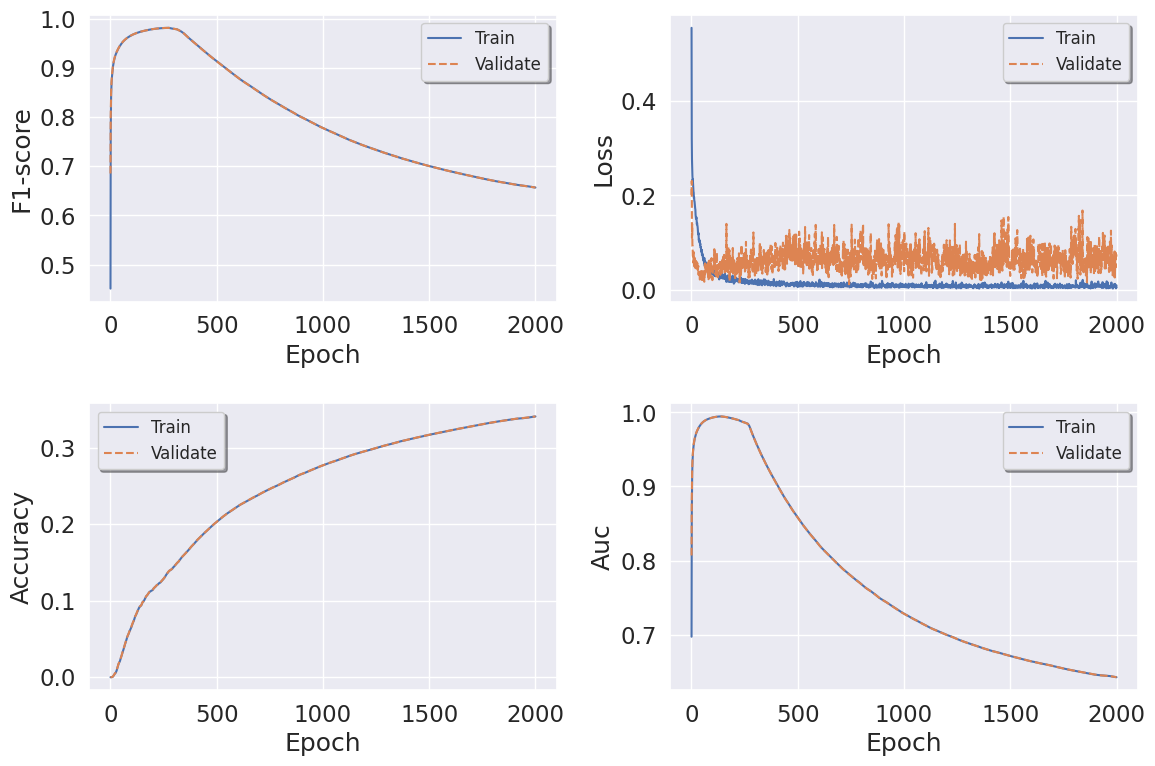

356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step    
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Performance: 


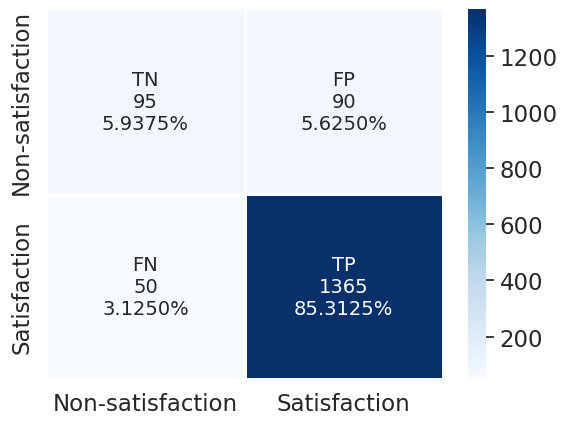

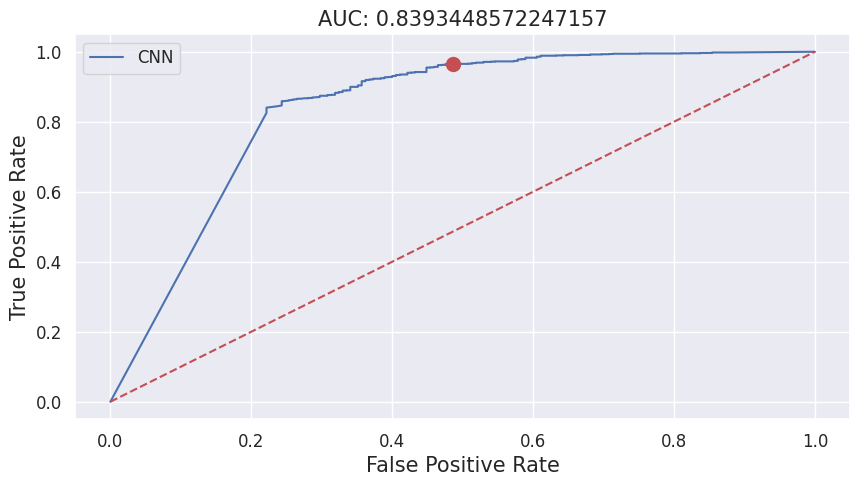

N True Positive True Negative False Positive False Negative  \
Test set  1600          1365            95             90             50   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9381 0.9647      0.5135   0.9512   0.9125            0.7391   

            AUC  
Test set 0.8393

N True Positive True Negative False Positive  \
Entire population  12968          7086          5723            109   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             50    0.9849 0.9930      0.9813   0.9889   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9877            0.9872 0.9954

356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Performance: 


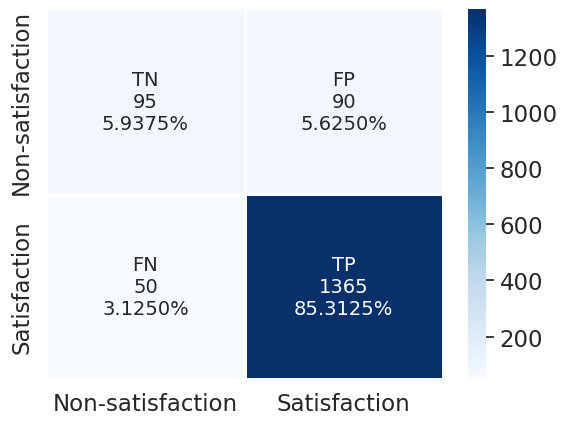

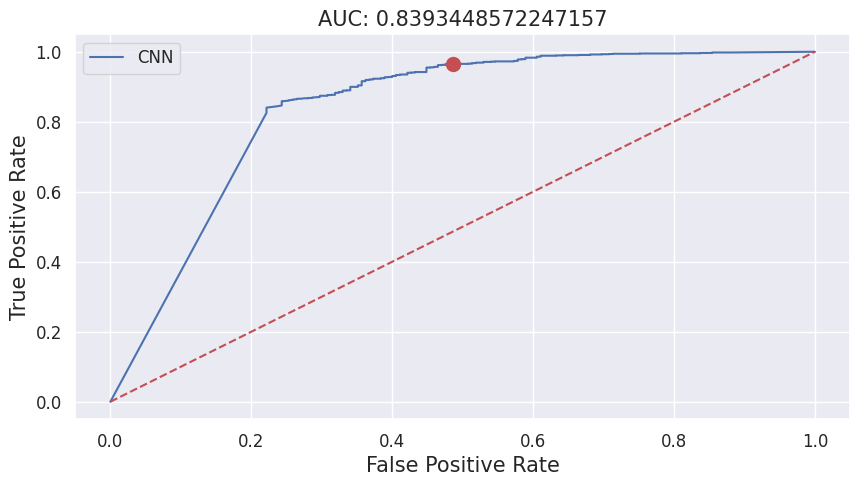

<Functional name=functional_2, built=True>

N True Positive True Negative False Positive False Negative  \
Test set  1600          1365            95             90             50   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9381 0.9647      0.5135   0.9512   0.9125            0.7391   

            AUC  
Test set 0.8393

N True Positive True Negative False Positive  \
Entire population  12968          7086          5723            109   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             50    0.9849 0.9930      0.9813   0.9889   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9877            0.9872 0.9954

In [9]:
# Reshape
if WEIGHT_METHOD != None:
    Y_train_dl, Y_validate_dl = reshape_YtoOneHot(Y_train, Y_validate)
else:
    Y_train_dl, Y_validate_dl = Y_train.copy(), Y_validate.copy()
X_train_dl, X_validate_dl = reshape_X2Dto3D(X_train, X_validate)

# 모델링
## 모델 구축
ALGO_NAME='CNN'
model = modeling_CNN1D(X_train_dl, Y_train_dl,
                       node_CNN1=NODE_CNN1,
                       node_CNN2=NODE_CNN2,
                       HIDDEN_ACTIVATION=HIDDEN_ACTIVATION, OUTPUT_ACTIVATION=OUTPUT_ACTIVATION,
                       KERNEL_SIZE=KERNEL_SIZE, STRIDE=STRIDE, PADDING=PADDING,
                       POOL_SIZE=POOL_SIZE, POOL_STRIDE=POOL_STRIDE,
                       REGULARIZER=REGULARIZER, DROPOUT_RATIO=DROPOUT_RATIO, LOSS=LOSS)
## 검증데이터 설정
if VALIDATION_SPLIT == None:
    VALIDATION_DATA = (X_validate_dl, Y_validate_dl)
else:
    VALIDATION_DATA = None
## 데이터 학습
model, FILENAME = learning(model, X_train_dl, X_validate_dl, Y_train_dl, 
                           WEIGHT_METHOD=WEIGHT_METHOD,
                           VALIDATION_SPLIT=VALIDATION_SPLIT, VALIDATION_DATA=VALIDATION_DATA,
                           BATCH_SIZE=BATCH_SIZE, EPOCHS=EPOCHS, VERBOSE=VERBOSE,
                           MONITOR=MONITOR, MONITOR_MODE=MONITOR_MODE, EARLYSTOP_PATIENT=EARLYSTOP_PATIENT,
                           shap=not SHAP, X_colname=X_colname, X_top_display=X_TOP_DISPLAY)
Score_te_cnn, Score_trte_cnn = prediction_class(model, X_train_dl, Y_train_dl, X_validate_dl, Y_validate_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(Score_te_cnn, Score_trte_cnn)

# 베스트 모델 로딩 및 예측
model_cnn = load_model(FILENAME)
Score_te_cnn, Score_trte_cnn = prediction_class(model, X_train_dl, Y_train_dl, X_validate_dl, Y_validate_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(model_cnn, Score_te_cnn, Score_trte_cnn)

# Summary

In [86]:
folder_location = os.path.join(os.getcwd(),'Result')
prediction_summary(folder_location=folder_location, 
                   # algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LGBM', 'CatBoost'])
                   algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LGBM', 'CatBoost', 'MLP', 'CNN'])


# Explanation

In [7]:
if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
    # FONT_NAME = 'Malgun Gothic'
    FONT_NAME = 'malgun'
    plt.rc('font', family=FONT_NAME) 
    plt.rcParams['font.family'] = FONT_NAME
    mpl.rc('font', family=FONT_NAME)
    sns.set(font=FONT_NAME) 
    sys_font = font_manager.findSystemFonts()
    FONT_PATHS = [path for path in sys_font if 'malgun' in path]
    if len(FONT_PATHS) != 0:
        rc('font', family=font_manager.FontProperties(fname=FONT_PATHS[0]).get_name())
elif platform.system() == 'Linux':
    FONT_NAME = 'NanumGothic'
    plt.rc('font', family=FONT_NAME) 
    plt.rcParams['font.family'] = FONT_NAME
    mpl.rc('font', family=FONT_NAME)
    sns.set(font=FONT_NAME) 
    sys_font = font_manager.findSystemFonts()
    FONT_PATHS = [path for path in sys_font if 'NanumGothic.ttf' in path]
    if len(FONT_PATHS) != 0:
        rc('font', family=font_manager.FontProperties(fname=FONT_PATHS[0]).get_name())

In [31]:
# model_rf, Score_te_rf, Score_trte_rf = modeling_RandomForestClassifier(X_train, Y_train, 
#                                                              X_validate, Y_validate, 
#                                                              X_colname=X_colname, 
#                                                              shap=SHAP, 
#                                                              feature_perturbation=FEATURE_PERTURBATION,
#                                                              X_top_display=X_TOP_DISPLAY, 
#                                                              dependency=not DEPENDENCY,
#                                                              label_list=LABEL_LIST)
# display(model_rf, Score_te_rf, Score_trte_rf)

Train Dataset:


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 180.69it/s]


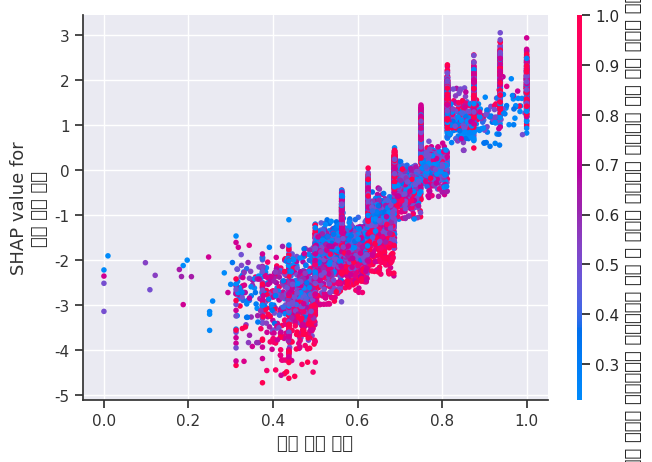

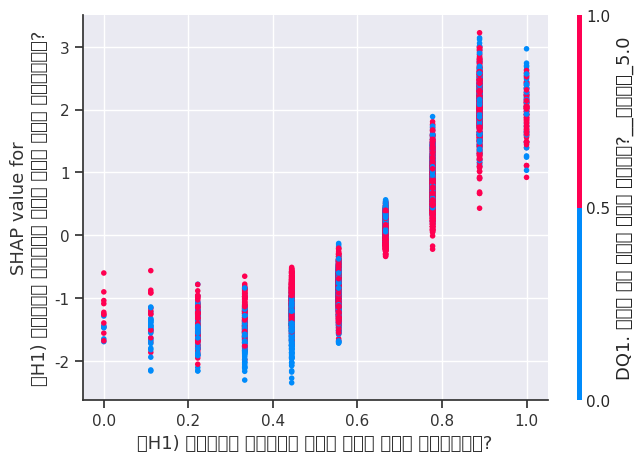

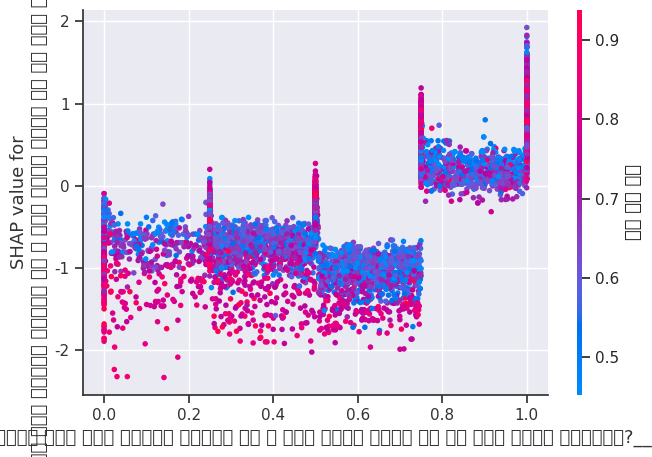

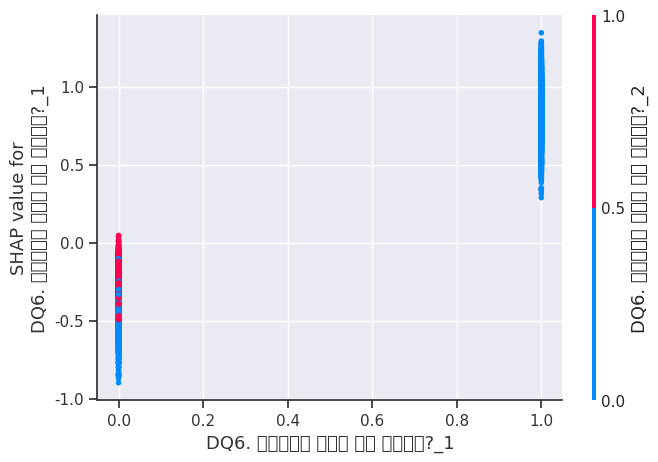

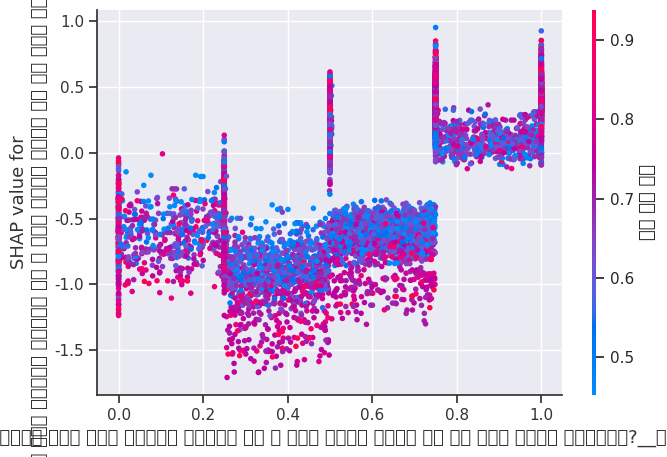

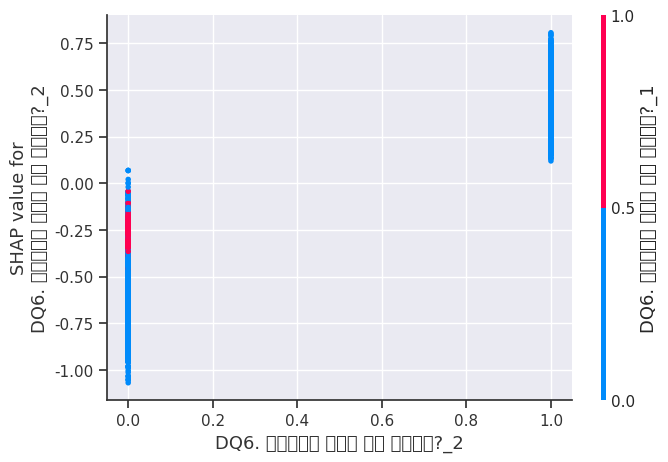

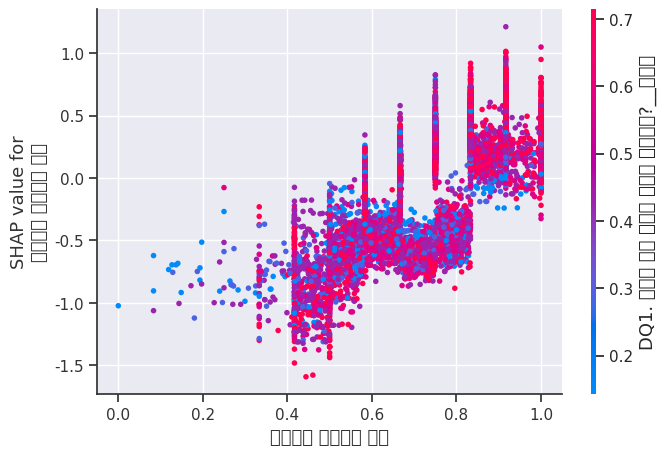

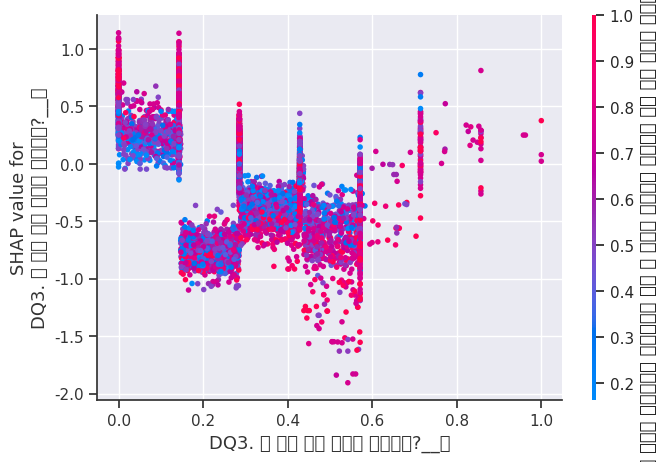

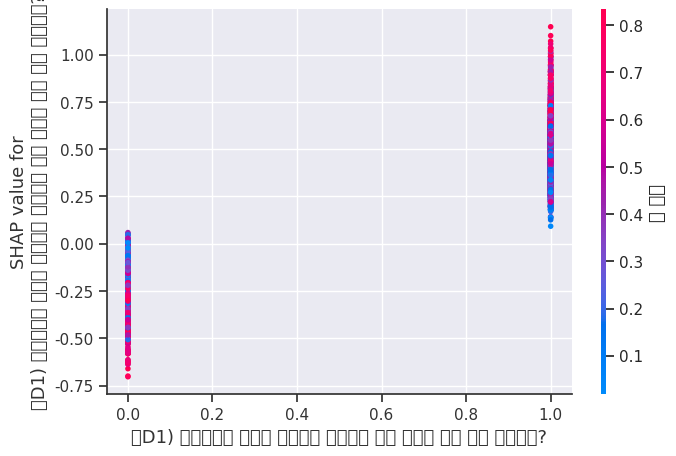

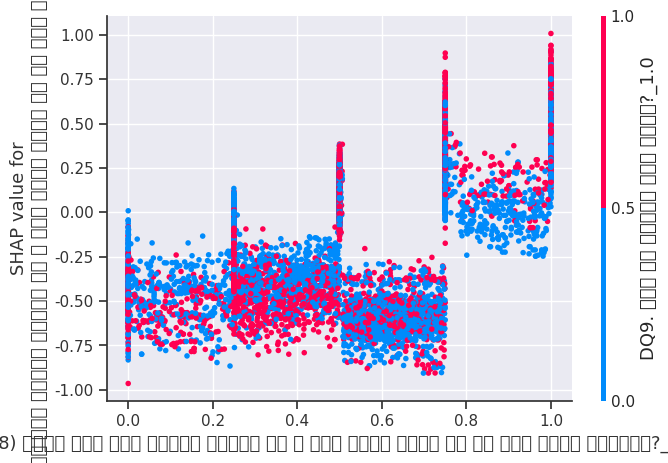

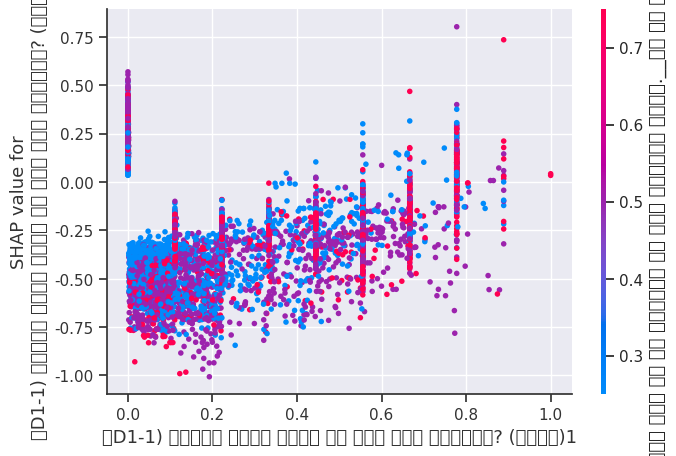

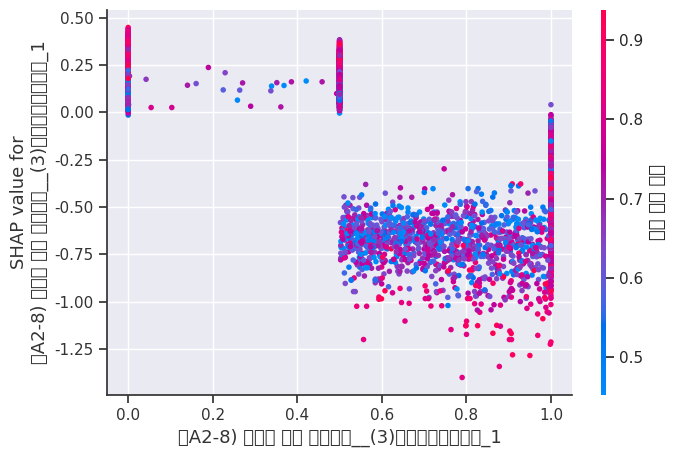

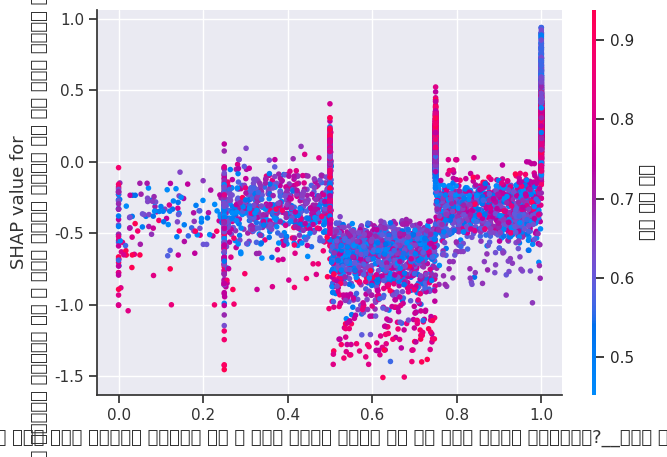

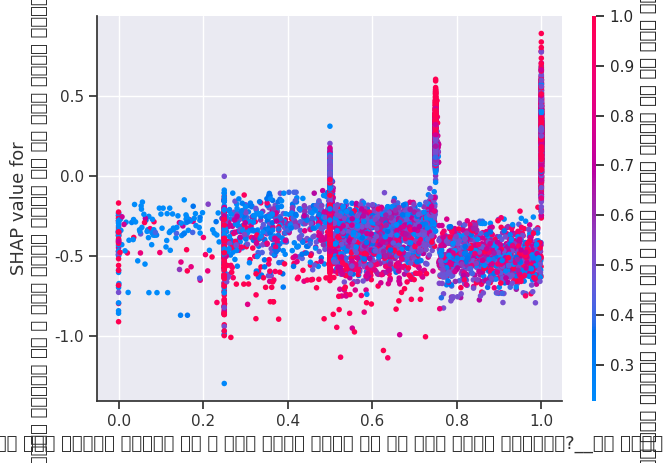

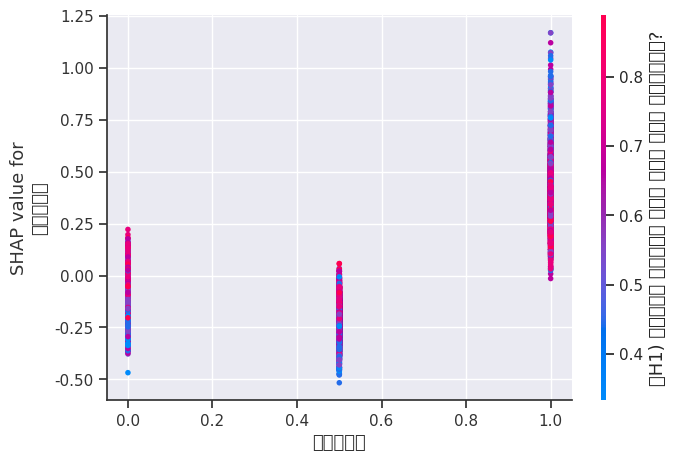

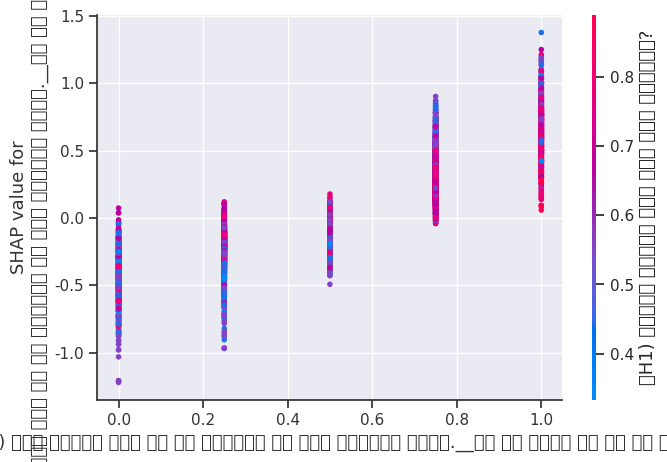

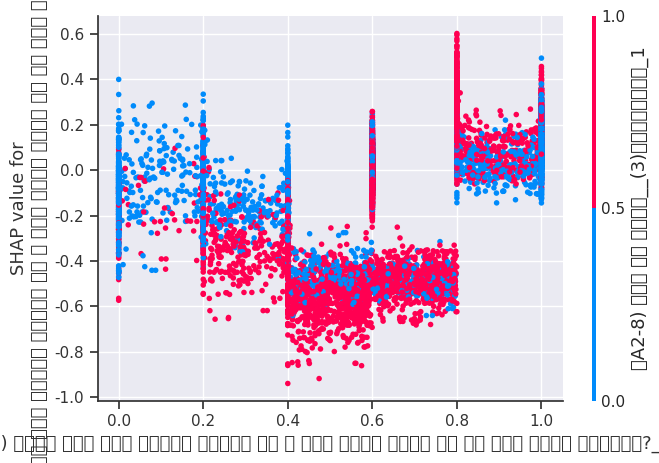

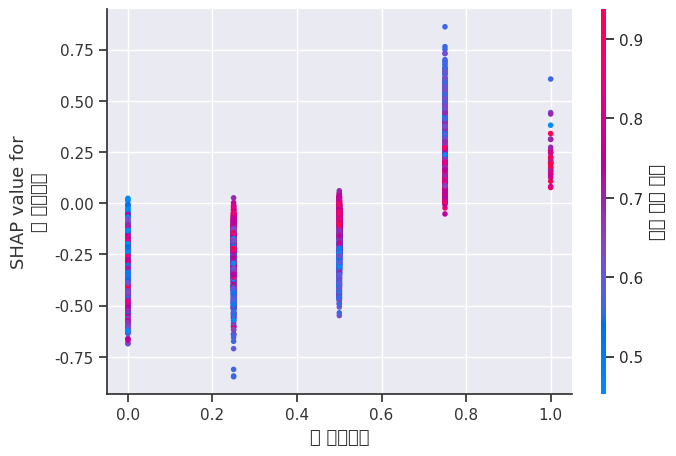

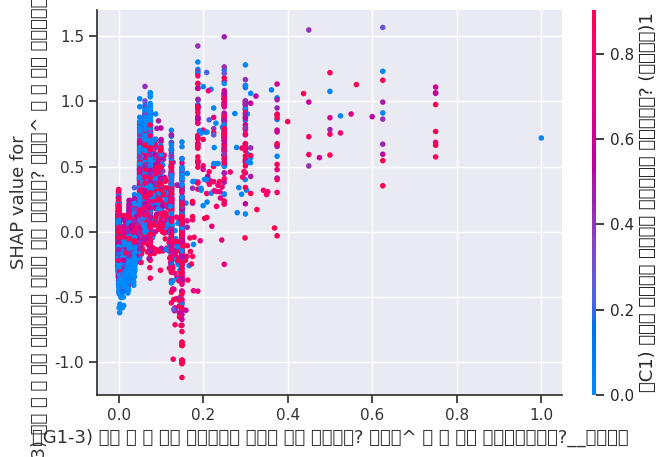

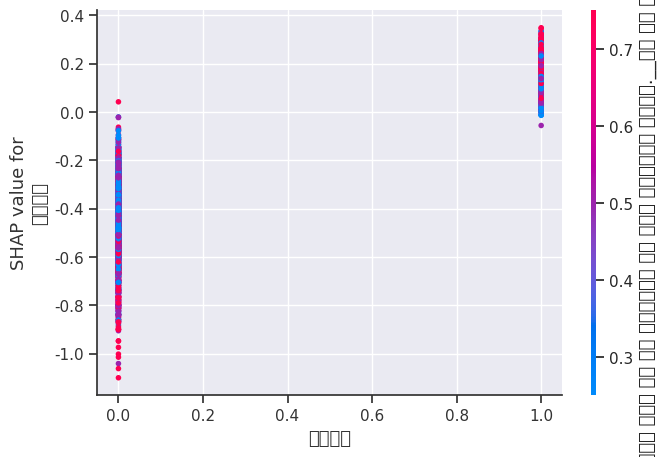

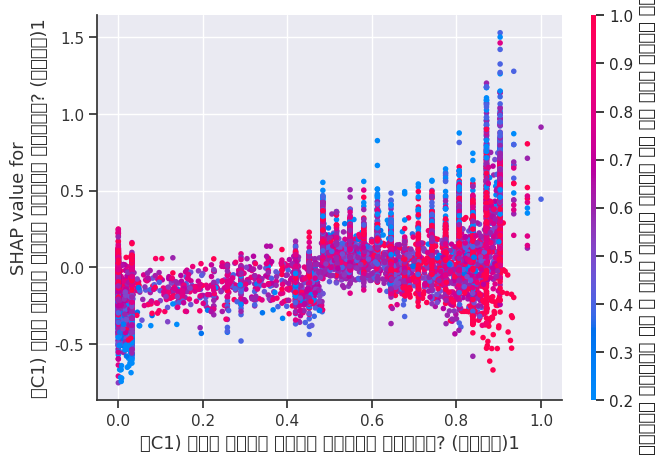

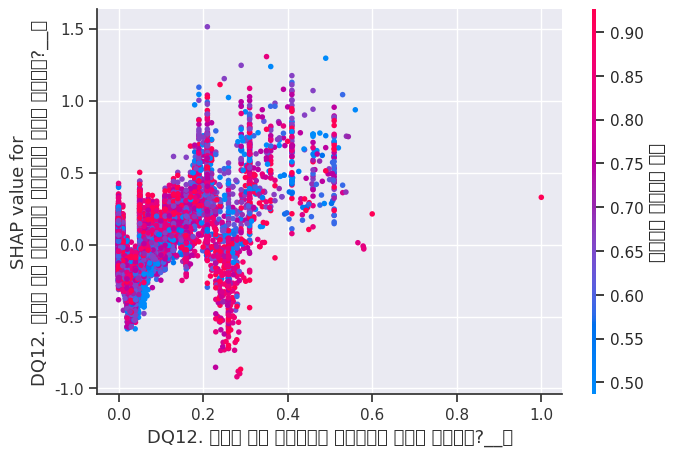

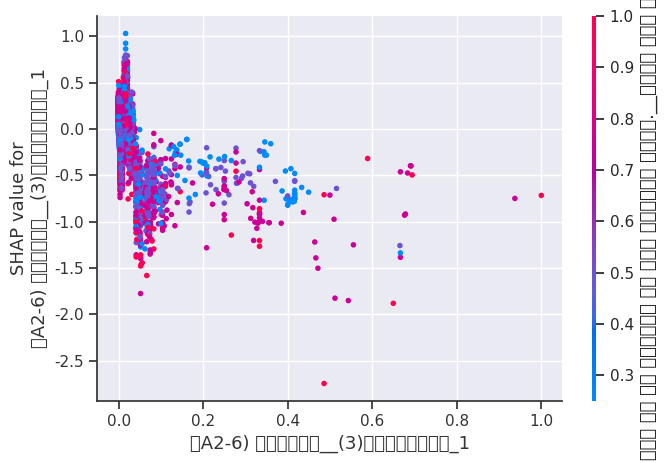

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd4f83a23c0>>
Traceback (most recent call last):
  File "/home/kk/.conda/envs/py312_cuda126dnn960/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



In [35]:
model_xgb, Score_te_xgb, Score_trte_xgb = modeling_XGBClassifier(X_train, Y_train, 
                                                      X_validate, Y_validate, 
                                                      X_colname=X_colname, 
                                                      shap=SHAP,
                                                      feature_perturbation=FEATURE_PERTURBATION,
                                                      X_top_display=X_TOP_DISPLAY, 
                                                      dependency=not DEPENDENCY,
                                                      label_list=LABEL_LIST)
display(model_xgb, Score_te_xgb, Score_trte_xgb)

In [101]:
# model_lgbm, Score_te_lgbm, Score_trte_lgbm = modeling_LGBMClassifier(X_train, Y_train, 
#                                                          X_validate, Y_validate, 
#                                                          X_colname=X_colname, 
#                                                          shap=SHAP, 
#                                                          feature_perturbation=FEATURE_PERTURBATION,
#                                                          X_top_display=X_TOP_DISPLAY, 
#                                                          dependency=not DEPENDENCY,
#                                                          label_list=LABEL_LIST)
# display(model_lgbm, Score_te_lgbm, Score_trte_lgbm)

# Understanding of Target Prediction

In [102]:
# Target Prediction
Y_tepred = pd.DataFrame(model_rf.predict(X_test), columns=[Y_colname])
X_te = pd.DataFrame(X_test, columns=X_colname)
comparisonstat_origin = table_ratiobyclass(pd.concat([Y_tepred, X_te], axis=1), Y_colname, 
                                           label_list=LABEL_LIST, sorting=True, 
                                           save=True, save_name=SAVE_NAME_PREDSTAT)
comparisonstat_origin

Number of significant features:  61 (0.6161616161616161%)


Non-satisfaction  \
학습 지향 평균                                                                           0.0000      15 (93.75%)   
                                                                                   0.1250      16 (94.12%)   
                                                                                   0.1875      31 (86.11%)   
                                                                                   0.2500      69 (87.34%)   
                                                                                   0.3125     140 (85.37%)   
...                                                                                                    ...   
문A3-7) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__고용안정    0.0000    2841 (22.70%)   
문A3-8) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__사회참여    0.0000    2841 (22.70%)   
문A3-9) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__친목도모 증진 0.0000    2841 (22.70%)   
문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1                                  0.0000    2841 (22.70%)   
문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여횟수                     0.0000    2841 (22.70%)   

                                                                                            Satisfaction  \
학습 지향 평균                                                                           0.0000      1 (6.25%)   
                                                                                   0.1250      1 (5.88%)   
                                                                                   0.1875     5 (13.89%)   
                                                                                   0.2500    10 (12.66%)   
                                                                                   0.3125    24 (14.63%)   
...                                                                                                  ...   
문A3-7) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__고용안정    0.0000  9673 (77.30%)   
문A3-8) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__사회참여    0.0000  9673 (77.30%)   
문A3-9) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__친목도모 증진 0.0000  9673 (77.30%)   
문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1                                  0.0000  9673 (77.30%)   
문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여횟수                     0.0000  9673 (77.30%)   

                                                                                                           Statistics  
학습 지향 평균                                                                           0.0000  $\chi^2$=3199.93, $p$=0.00  
                                                                                   0.1250                              
                                                                                   0.1875                              
                                                                                   0.2500                              
                                                                                   0.3125                              
...                                                                                                               ...  
문A3-7) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__고용안정    0.0000            $T$=nan, $p$=nan  
문A3-8) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__사회참여    0.0000            $T$=nan, $p$=nan  
문A3-9) 귀하께서 작년에 참여한 학습경험이 전반적으로 다음 각 항목과 관련하여 귀하에게 어느 정도 도움이 되었다고 생각하십니까?__친목도모 증진 0.0000            $T$=nan, $p$=nan  
문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1                                  0.0000            $T$=nan, $p$=nan  
문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여횟수                     0.0000            $T$=nan, $p$=nan  

[392 rows x 3 columns]